#### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

#### Load the data

In [3]:
dataset=dataset=dataset=r"C:\Users\DELL\Downloads\telcom_data (2).xlsx - Sheet1.csv"
df= pd.read_csv(dataset)
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,0,0,0,0,1.311450e+19,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,...,8.814393e+06,3.674974e+07,3.088796e+08,3.456294e+08,3.456294e+08,4/4/19 12:01,4/25/19 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,1,1,1,1,1.311450e+19,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,...,1.505514e+07,5.380039e+07,6.533850e+08,7.071854e+08,7.071854e+08,4/9/19 13:04,4/25/19 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,2,2,2,2,1.311450e+19,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,...,4.215763e+06,2.788364e+07,2.798073e+08,3.076910e+08,3.076910e+08,4/9/19 17:42,4/25/19 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,3,3,3,3,1.311450e+19,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,...,1.279728e+07,4.332422e+07,8.460285e+08,8.893527e+08,8.893527e+08,4/10/19 0:31,4/25/19 7:36,T21824A,undefined,undefined
4,4,4,4,4,1.311450e+19,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,...,1.391032e+07,3.854281e+07,5.691386e+08,6.076814e+08,6.076814e+08,4/12/19 20:10,4/25/19 10:40,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,149996,149996,149996,7.277830e+18,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,...,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08,6.318041e+08,4/29/19 7:28,4/30/19 6:02,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,149997,149997,149997,149997,7.349880e+18,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,...,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08,7.057839e+08,4/29/19 7:28,4/30/19 10:41,D10223C,Apple,Apple iPhone Se (A1723)
149998,149998,149998,149998,149998,1.311450e+19,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,...,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08,6.276986e+08,4/29/19 7:28,4/30/19 10:46,T51102A,Apple,Apple iPhone Xs (A2097)
149999,149999,149999,149999,149999,1.311450e+19,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,...,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08,4.015220e+08,4/29/19 7:28,4/30/19 10:40,L88342B,Huawei,Huawei Fig-Lx1


In [4]:
df.head(5)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,0,0,0,0,1.311450e+19,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,...,8814393.0,36749741.0,308879636.0,345629377.0,345629377.0,4/4/19 12:01,4/25/19 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,1,1,1,1,1.311450e+19,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,...,15055145.0,53800391.0,653384965.0,707185356.0,707185356.0,4/9/19 13:04,4/25/19 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,2,2,2,2,1.311450e+19,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,...,4215763.0,27883638.0,279807335.0,307690973.0,307690973.0,4/9/19 17:42,4/25/19 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,3,3,3,3,1.311450e+19,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,...,12797283.0,43324218.0,846028530.0,889352748.0,889352748.0,4/10/19 0:31,4/25/19 7:36,T21824A,undefined,undefined
4,4,4,4,4,1.311450e+19,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,...,13910322.0,38542814.0,569138589.0,607681403.0,607681403.0,4/12/19 20:10,4/25/19 10:40,D88865A,Samsung,Samsung Sm-G390F


In [5]:
df.tail(5)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Start,End,Last Location Name,Handset Manufacturer,Handset Type
149996,149996,149996,149996,149996,7.277830e+18,451.0000,214.00000,81230.000000,2.082022e+14,3.365069e+10,...,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08,6.318041e+08,4/29/19 7:28,4/30/19 6:02,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,149997,149997,149997,149997,7.349880e+18,483.0000,187.00000,97970.000000,2.082019e+14,3.366345e+10,...,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08,7.057839e+08,4/29/19 7:28,4/30/19 10:41,D10223C,Apple,Apple iPhone Se (A1723)
149998,149998,149998,149998,149998,1.311450e+19,283.0000,810.00000,98249.000000,2.082017e+14,3.362189e+10,...,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08,6.276986e+08,4/29/19 7:28,4/30/19 10:46,T51102A,Apple,Apple iPhone Xs (A2097)
149999,149999,149999,149999,149999,1.311450e+19,696.0000,327.00000,97910.000000,2.082021e+14,3.361962e+10,...,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08,4.015220e+08,4/29/19 7:28,4/30/19 10:40,L88342B,Huawei,Huawei Fig-Lx1
150000,150000,150000,150000,150000,1.013887e+19,499.1882,498.80088,104608.560347,2.082016e+14,4.188282e+10,...,8.264799e+06,4.112121e+07,4.546434e+08,4.957646e+08,4.957646e+08,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(150001, 61)

In [7]:
df.columns.tolist()

['Unnamed: 0.3',
 'Unnamed: 0.2',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 61 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0.3                              150001 non-null  int64  
 1   Unnamed: 0.2                              150001 non-null  int64  
 2   Unnamed: 0.1                              150001 non-null  int64  
 3   Unnamed: 0                                150001 non-null  int64  
 4   Bearer Id                                 150001 non-null  float64
 5   Start ms                                  150001 non-null  float64
 6   End ms                                    150001 non-null  float64
 7   Dur. (ms)                                 150001 non-null  float64
 8   IMSI                                      150001 non-null  float64
 9   MSISDN/Number                             150001 non-null  float64
 10  IMEI                

# 1.User Overiew Analysis

In [9]:
# Start by identifying the top 10 handsets used by the customers. 
top_10_handsets = df['Handset Type'].value_counts(ascending = False).head(10)
top_10_handsets = pd.DataFrame(top_10_handsets)
top_10_handsets

,count
Handset Type,
Huawei B528S-23A,19752
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520


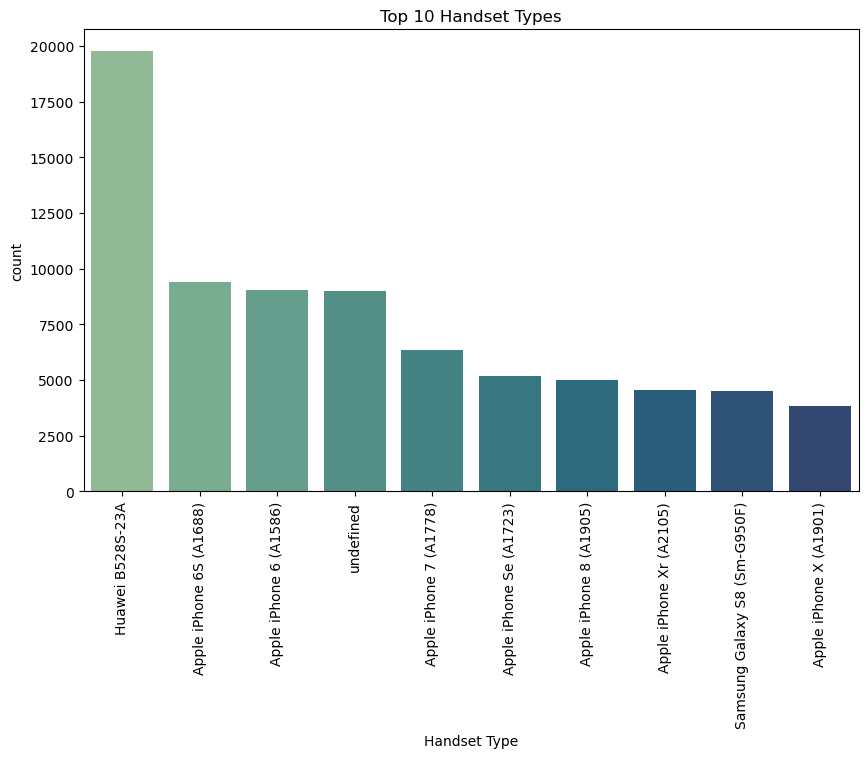

In [10]:
# Create a barplot of top 10 handset
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=top_10_handsets.index, y='count', data=top_10_handsets, palette='crest')

# Customize the plot
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [11]:
#  identify the top 3 handset manufacturers
top_3_handsets_Manufacturers = df['Handset Manufacturer'].value_counts(ascending = False).head(3)
top_3_handsets_Manufacturers = pd.DataFrame(top_3_handsets_Manufacturers)
top_3_handsets_Manufacturers

,count
Handset Manufacturer,
Apple,59565
Samsung,40839
Huawei,34423


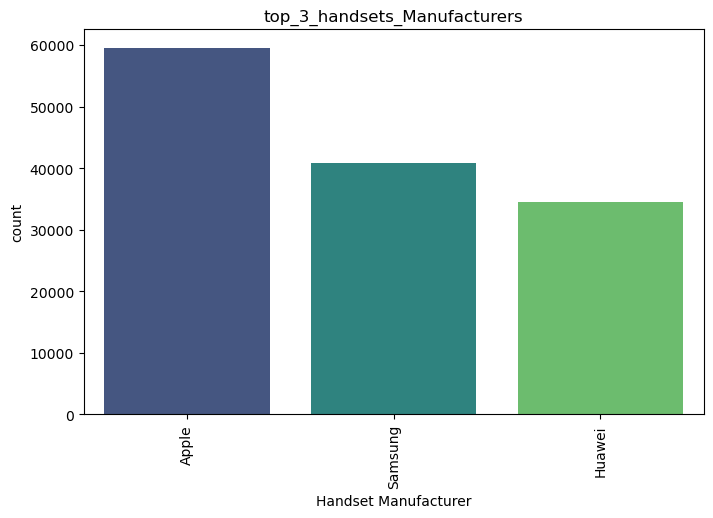

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x= top_3_handsets_Manufacturers.index, y = 'count',data=top_3_handsets_Manufacturers, palette='viridis')
# Customize the plot
plt.title('top_3_handsets_Manufacturers')
plt.xlabel('Handset Manufacturer')
plt.ylabel('count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [13]:
# identify the top 5 handsets per top 3 handset manufacturer 
for manufacturer in top_3_handsets_Manufacturers.index:
    top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_5_handsets_per_manufacturer)
    print("\n")

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64




In [14]:
# short interpretation and recommendation to marketing teams
interpretation = """
Interpretation:
1. The top 10 handsets used by customers have been identified, indicating the most popular devices.
2. The top 3 handset manufacturers are determined, providing insights into market dominance.
3. The top 5 handsets per top 3 manufacturers offer a detailed view of popular devices from key manufacturers.

Recommendation to Marketing Teams:
Based on the analysis, marketing teams can focus on promoting and optimizing services for the top handsets and manufacturers.
Consider partnerships or special promotions with the top manufacturers to leverage their market presence.
Tailor advertising strategies for popular applications identified in xDR data sessions, such as Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.
"""

print("Interpretation and Recommendation:")
print(interpretation)

Interpretation and Recommendation:

Interpretation:
1. The top 10 handsets used by customers have been identified, indicating the most popular devices.
2. The top 3 handset manufacturers are determined, providing insights into market dominance.
3. The top 5 handsets per top 3 manufacturers offer a detailed view of popular devices from key manufacturers.

Recommendation to Marketing Teams:
Based on the analysis, marketing teams can focus on promoting and optimizing services for the top handsets and manufacturers.
Consider partnerships or special promotions with the top manufacturers to leverage their market presence.
Tailor advertising strategies for popular applications identified in xDR data sessions, such as Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.



#### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.

##### ● Aggregate per user the following information in the column  

In [17]:
def aggregate_per_user(df):

    columns_to_show = ['Dur. (ms)', 'Total UL (Bytes)', 
                   'Total DL (Bytes)', ]

    return df.groupby(['Bearer Id'])[columns_to_show].agg([np.mean, np.min, 
                                            np.max,])

aggregate_per_user(df)

Dur. (ms)                      Total UL (Bytes)              \
                       mean       min        max             mean         min   
Bearer Id                                                                       
6.917540e+18   59200.758240    7146.0   355758.0     4.130933e+07   5921981.0   
7.277830e+18   75667.617420    7284.0  1328732.0     4.125749e+07   5461287.0   
7.349880e+18  133635.315821    8949.0  1573420.0     4.108827e+07   2866892.0   
7.421940e+18   67042.989691   12103.0   301616.0     4.107144e+07  10210682.0   
7.566060e+18  153399.000000  153399.0   153399.0     5.890703e+07  58907032.0   
1.013887e+19   50834.301272    7212.0   470053.0     4.094145e+07   7732426.0   
1.268210e+19   33674.717846    7364.0   243646.0     4.096270e+07   7934749.0   
1.304240e+19   80639.069018    7142.0  1859336.0     4.108569e+07   4338786.0   
1.311450e+19  132829.813892    7697.0  1859327.0     4.105602e+07   6243519.0   
1.318650e+19   67987.000000   10954.0   255505.0     4.244523e+07  13884525.0   

                         Total DL (Bytes)                           
                     max             mean         min          max  
Bearer Id                                                           
6.917540e+18  73936462.0     4.544635e+08  14194498.0  891643520.0  
7.277830e+18  77458132.0     4.547874e+08   9046209.0  899502184.0  
7.349880e+18  77157382.0     4.544351e+08   8827082.0  902969616.0  
7.421940e+18  68552172.0     4.673357e+08  64413845.0  895681761.0  
7.566060e+18  58907032.0     8.131301e+07  81313010.0   81313010.0  
1.013887e+19  70590714.0     4.477856e+08  25592436.0  883431445.0  
1.268210e+19  71093966.0     4.684946e+08  17697045.0  889115655.0  
1.304240e+19  78331311.0     4.533535e+08   7114041.0  899212554.0  
1.311450e+19  77390291.0     4.560214e+08   9199518.0  894503152.0  
1.318650e+19  64738232.0     4.127670e+08  31181078.0  872688792.0

In [18]:
# number of xDR sessions
xdr_sess = df[['Bearer Id', 'MSISDN/Number']]
a = xdr_sess.groupby('MSISDN/Number').count()
a.columns = ['xdr sessions']
a.head()

,xdr sessions
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2


In [19]:
# Session duration 
Session_duration = df[['Dur. (ms)', 'MSISDN/Number']]
b = Session_duration.groupby('MSISDN/Number').sum()
b.columns = ['sess_duration (ms)']
b.head()

,sess_duration (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,37104.0


In [20]:
# the total download (DL) and upload (UL) data
byte = df[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09


In [21]:
# Ensure the required columns are present
required_columns = ['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']
if not all(column in df.columns for column in required_columns):
    print("Required columns are missing in the dataset.")
    # You may need to adjust the column names according to your dataset structure.
    # Also, make sure the columns are in numeric format.

# Calculate total bytes and group by 'MSISDN/Number'
df['Total_bytes'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
total_bytes_grouped = df.groupby('MSISDN/Number')['Total_bytes'].sum()

# Display the result
print(total_bytes_grouped.head())

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
Name: Total_bytes, dtype: float64


In [22]:
# Ensure the 'Total DL (Bytes)' and 'Total UL (Bytes)' columns are present
required_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']
if not all(column in df.columns for column in required_columns):
    print("Required columns are missing in the dataset.")
    # You may need to adjust the column names according to your dataset structure.
    # Also, make sure the columns are in numeric format.

# Calculate total download (DL) and upload (UL) data
total_dl = df['Total DL (Bytes)'].sum()
total_ul = df['Total UL (Bytes)'].sum()

print(f'Total Download Data: {total_dl} Bytes')
print(f'Total Upload Data: {total_ul} Bytes')

Total Download Data: 68196969155275.08 Bytes
Total Upload Data: 6168222065022.292 Bytes


In [23]:
# Assuming you have 'Total UL (Bytes)' and 'Total DL (Bytes)' columns
df['total_bytes'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Now you can use the column in your analysis
byte = df[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes),total_bytes
MSISDN/Number,,,
3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,94280527.0,1.363130e+09,1.457411e+09


Text(0.5, 1.0, 'A sample of users upload, download and total bytes')

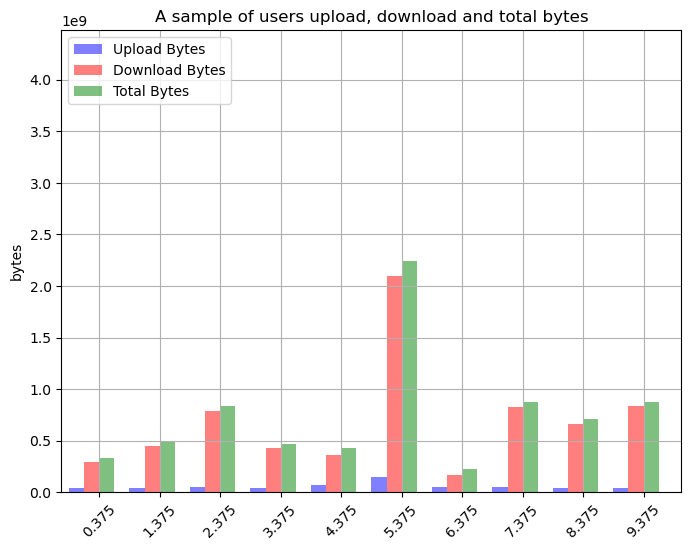

In [24]:
# plotting a sample of the data
t = c.sample(10)
pos = list(range(len(t['Total UL (Bytes)'])))
width = 0.25
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos, t['Total UL (Bytes)'], width, alpha=0.5, color='b')
plt.bar([p + width for p in pos], t['Total DL (Bytes)'], width, alpha=0.5, color='r')
plt.bar([p + width*2 for p in pos], t['total_bytes'], width, alpha=0.5, color='g')
ax.set_ylabel('bytes')
ax.set_title('Bytes data per user')
ax.set_xticks([p + 1.5 * width for p in pos])
plt.xticks(rotation = 45)

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(t['Total UL (Bytes)'] + t['Total DL (Bytes)'] + t['total_bytes'])] )
plt.legend(['Upload Bytes', 'Download Bytes', 'Total Bytes'], loc='upper left')
plt.grid()
plt.title('A sample of users upload, download and total bytes')

In [25]:
# 4.The total data volume (in Bytes) during this session for each application
byte = df[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes),total_bytes
MSISDN/Number,,,
3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,94280527.0,1.363130e+09,1.457411e+09


#### Task 1.2 - Conduct exploratory data analysis on those data & communicate useful insights.

In [27]:
numerical = []
categorical = []
timestamps = []

for col in df.columns:
    if df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif df[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
df1 = df[features]
df1.head(3)

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,0,0,0,0,1.311450e+19,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,...,8814393.0,36749741.0,308879636.0,345629377.0,345629377.0,4/4/19 12:01,4/25/19 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,1,1,1,1,1.311450e+19,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,...,15055145.0,53800391.0,653384965.0,707185356.0,707185356.0,4/9/19 13:04,4/25/19 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,2,2,2,2,1.311450e+19,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,...,4215763.0,27883638.0,279807335.0,307690973.0,307690973.0,4/9/19 17:42,4/25/19 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)


In [28]:
df1.shape

(150001, 61)

In [29]:
df1.isna().sum()

Unnamed: 0.3               0
Unnamed: 0.2               0
Unnamed: 0.1               0
Unnamed: 0                 0
Bearer Id                  0
                        ... 
Start                      1
End                        1
Last Location Name      1153
Handset Manufacturer     572
Handset Type             572
Length: 61, dtype: int64

In [30]:
#Null numerical values (percentage)
null = df1[numerical].isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc

,0
Unnamed: 0.3,0.0
Unnamed: 0.2,0.0
Nb of sec with 125000B < Vol DL,0.0
Nb of sec with 1250B < Vol UL < 6250B,0.0
Nb of sec with 31250B < Vol DL < 125000B,0.0
Nb of sec with 37500B < Vol UL,0.0
Nb of sec with 6250B < Vol DL < 31250B,0.0
Nb of sec with 6250B < Vol UL < 37500B,0.0
Nb of sec with Vol DL < 6250B,0.0
Nb of sec with Vol UL < 1250B,0.0


In [31]:
# columns with >50% null values
bad_data = []
for entry, column in zip(null_perc.iloc[:, 0], null_perc.index):
    if entry >= 50:
        bad_data.append(column)
        
bad_data

[]

In [32]:
# get the numerical null values indices from the dataframe
a = null_perc.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = df1.columns.get_loc(col)
    indices.append(k)
# col_index
len(indices)

56

In [33]:
# MSISDN/Number is more of a categorical column than numurical given its a unique id for each user.
# imputing it with mean would result to the creation of non-existence users. Like other categorical variables with nan, it'll be imputed with mode
df1.columns.get_loc('MSISDN/Number')

9

In [34]:
#imputing with column means.
columns = indices
for col in columns:
    x = df1.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    df1.iloc[:, col] = x #indices.remove(h)

In [35]:
x

array([[3.45629377e+08],
       [7.07185356e+08],
       [3.07690973e+08],
       ...,
       [6.27698629e+08],
       [4.01522016e+08],
       [4.95764636e+08]])

In [36]:
df1[numerical].isna().any()

Unnamed: 0.3                                False
Unnamed: 0.2                                False
Unnamed: 0.1                                False
Unnamed: 0                                  False
Bearer Id                                   False
Start ms                                    False
End ms                                      False
Dur. (ms)                                   False
IMSI                                        False
MSISDN/Number                               False
IMEI                                        False
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                 False
TCP UL Retrans. Vol (Bytes)                 False
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False


In [37]:
#Null categorical and timestamps values 
null = df1[categorical + timestamps].isna().sum().sort_values(ascending = False)
null = (null/150001) * 100
null = pd.DataFrame(null)
null

,0
Last Location Name,0.768662
Handset Manufacturer,0.381331
Handset Type,0.381331
Start,0.000667
End,0.000667


In [38]:
for col in categorical+timestamps:
    df1[col] = df1[col].astype(str)

In [39]:
# get the numerical null values indices from the dataframe
a = null.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = df1.columns.get_loc(col)
    indices.append(k)
    
indices

[58, 59, 60, 56, 57]

In [40]:
# imputing with mode
indices.append(4) #the user id col
columns = indices
for col in columns:
    x = df1.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    df1.iloc[:, col] = x 

In [41]:
x

array([[1.31145000e+19],
       [1.31145000e+19],
       [1.31145000e+19],
       ...,
       [1.31145000e+19],
       [1.31145000e+19],
       [1.01388718e+19]])

In [42]:
df1[categorical+timestamps].isna().any()

Start                   False
End                     False
Last Location Name      False
Handset Manufacturer    False
Handset Type            False
dtype: bool

In [43]:
df1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,0,0,0,0,1.311450e+19,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,...,8814393.0,36749741.0,308879636.0,345629377.0,345629377.0,4/4/19 12:01,4/25/19 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,1,1,1,1,1.311450e+19,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,...,15055145.0,53800391.0,653384965.0,707185356.0,707185356.0,4/9/19 13:04,4/25/19 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,2,2,2,2,1.311450e+19,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,...,4215763.0,27883638.0,279807335.0,307690973.0,307690973.0,4/9/19 17:42,4/25/19 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,3,3,3,3,1.311450e+19,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,...,12797283.0,43324218.0,846028530.0,889352748.0,889352748.0,4/10/19 0:31,4/25/19 7:36,T21824A,undefined,undefined
4,4,4,4,4,1.311450e+19,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,...,13910322.0,38542814.0,569138589.0,607681403.0,607681403.0,4/12/19 20:10,4/25/19 10:40,D88865A,Samsung,Samsung Sm-G390F


In [44]:
df1.to_csv(r"C:\Users\DELL\Downloads\telcom_data (2).xlsx - Sheet1.csv")
df1

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,0,0,0,0,1.311450e+19,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,...,8.814393e+06,3.674974e+07,3.088796e+08,3.456294e+08,3.456294e+08,4/4/19 12:01,4/25/19 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,1,1,1,1,1.311450e+19,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,...,1.505514e+07,5.380039e+07,6.533850e+08,7.071854e+08,7.071854e+08,4/9/19 13:04,4/25/19 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,2,2,2,2,1.311450e+19,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,...,4.215763e+06,2.788364e+07,2.798073e+08,3.076910e+08,3.076910e+08,4/9/19 17:42,4/25/19 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,3,3,3,3,1.311450e+19,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,...,1.279728e+07,4.332422e+07,8.460285e+08,8.893527e+08,8.893527e+08,4/10/19 0:31,4/25/19 7:36,T21824A,undefined,undefined
4,4,4,4,4,1.311450e+19,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,...,1.391032e+07,3.854281e+07,5.691386e+08,6.076814e+08,6.076814e+08,4/12/19 20:10,4/25/19 10:40,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,149996,149996,149996,7.277830e+18,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,...,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08,6.318041e+08,4/29/19 7:28,4/30/19 6:02,D20434A,Apple,Apple iPhone 8 Plus (A1897)
149997,149997,149997,149997,149997,7.349880e+18,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,...,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08,7.057839e+08,4/29/19 7:28,4/30/19 10:41,D10223C,Apple,Apple iPhone Se (A1723)
149998,149998,149998,149998,149998,1.311450e+19,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,...,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08,6.276986e+08,4/29/19 7:28,4/30/19 10:46,T51102A,Apple,Apple iPhone Xs (A2097)
149999,149999,149999,149999,149999,1.311450e+19,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,...,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08,4.015220e+08,4/29/19 7:28,4/30/19 10:40,L88342B,Huawei,Huawei Fig-Lx1


In [45]:
df1.shape

(150001, 61)

In [46]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149996    False
149997    False
149998    False
149999    False
150000    False
Length: 150001, dtype: bool

In [47]:
df1.isnull().sum()

Unnamed: 0.3            0
Unnamed: 0.2            0
Unnamed: 0.1            0
Unnamed: 0              0
Bearer Id               0
                       ..
Start                   0
End                     0
Last Location Name      0
Handset Manufacturer    0
Handset Type            0
Length: 61, dtype: int64

In [48]:
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

In [49]:
df1['total_bytes'] =  df1['Total UL (Bytes)'] + df1['Total DL (Bytes)']
df1['social_media'] = df1['Social Media DL (Bytes)'] + df1['Social Media UL (Bytes)']
df1['email'] = df1['Email DL (Bytes)'] + df1['Email UL (Bytes)']
df1['google'] = df1['Google DL (Bytes)'] + df1['Google UL (Bytes)']
df1['youtube'] = df1['Youtube DL (Bytes)'] + df1['Youtube UL (Bytes)']
df1['netflix'] = df1['Netflix UL (Bytes)'] + df1['Netflix DL (Bytes)']
df1['gaming'] = df1['Gaming DL (Bytes)'] + df1['Gaming UL (Bytes)']
df1['other'] = df1['Other DL (Bytes)'] + df1['Other UL (Bytes)']
df1['total_tp'] = df1['Avg Bearer TP DL (kbps)'] + df1['Avg Bearer TP UL (kbps)']
df1['total_rtt'] = df1['Avg RTT DL (ms)'] + df1['Avg RTT UL (ms)']
df1['total_tcp'] = df1['TCP DL Retrans. Vol (Bytes)'] + df1['TCP UL Retrans. Vol (Bytes)']

In [50]:
variables = df1[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media', 'netflix',
                  'gaming', 'youtube', 'google', 'email', 'other', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]
variables.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bearer Id,150001.0,1.013887e+19,2.883597e+18,6.917540e+18,7.349880e+18,7.349880e+18,1.304240e+19,1.318650e+19
Dur. (ms).1,150001.0,1.046091e+08,8.103734e+07,7.142988e+06,5.744206e+07,8.639998e+07,1.324307e+08,1.859336e+09
Total UL (Bytes),150001.0,4.112121e+07,1.127635e+07,2.866892e+06,3.322203e+07,4.114324e+07,4.903424e+07,7.833131e+07
Total DL (Bytes),150001.0,4.546434e+08,2.441421e+08,7.114041e+06,2.431072e+08,4.558409e+08,6.657051e+08,9.029696e+08
social_media,150001.0,1.828250e+06,1.035646e+06,1.563000e+03,9.322180e+05,1.826471e+06,2.727487e+06,3.650861e+06
netflix,150001.0,2.262861e+07,9.260820e+06,9.843200e+04,1.597946e+07,2.263554e+07,2.929044e+07,4.519815e+07
gaming,150001.0,4.303331e+08,2.440199e+08,3.063580e+05,2.187279e+08,4.316150e+08,6.414159e+08,8.592028e+08
youtube,150001.0,2.264348e+07,9.246800e+06,7.890300e+04,1.599846e+07,2.266177e+07,2.929260e+07,4.519008e+07
google,150001.0,7.807295e+06,3.516420e+06,4.033000e+04,4.943599e+06,7.812835e+06,1.068280e+07,1.552878e+07
email,150001.0,2.259102e+06,1.071109e+06,8.359000e+03,1.359344e+06,2.263567e+06,3.159818e+06,4.518036e+06


In [51]:
df1['Bearer Id'].nunique()

10

In [52]:
# Assuming 'variables' is your DataFrame
# If your DataFrame is named 'df1', replace 'variables' with 'df1'

# Convert non-numeric values to NaN
variables_numeric = variables.apply(pd.to_numeric, errors='coerce')

# Calculate skewness and kurtosis
s = variables_numeric.skew(axis=0, skipna=True)
k = variables_numeric.kurt(axis=0, skipna=True)

# Create a new DataFrame with skewness and kurtosis
result_df = pd.DataFrame({'Skewness': s, 'Kurtosis': k})

# Display the result DataFrame
print(result_df)

                               Skewness      Kurtosis
Bearer Id                      0.026755     -1.988473
Dur. (ms).1                    3.952622     37.022470
Total UL (Bytes)              -0.002456     -0.327436
Total DL (Bytes)              -0.003153     -1.198363
social_media                  -0.002121     -1.202178
netflix                       -0.000409     -0.608472
gaming                        -0.003225     -1.202256
youtube                       -0.005465     -0.604624
google                        -0.010602     -0.963035
email                         -0.006033     -1.061696
other                          0.001256     -1.196015
Avg RTT DL (ms)               69.705161   8805.687875
Avg RTT UL (ms)               31.530109   1632.646032
Avg Bearer TP DL (kbps)        2.589445      9.573691
Avg Bearer TP UL (kbps)        4.503428     25.086860
TCP DL Retrans. Vol (Bytes)   24.840677    697.574773
TCP UL Retrans. Vol (Bytes)  141.035684  21913.803296


In [53]:
#IQR

#google
Q1 = np.percentile(df1.google, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.google, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.google, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.google, interpolation = 'midpoint') 
o = (df1.google < (Q1 - 1.5 * IQR)) |(df1.google > (Q3 + 1.5 * IQR))
i = o.unique()

#youtube
Q1 = np.percentile(df1.youtube, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.youtube, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.youtube, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.youtube, interpolation = 'midpoint') 
o = (df1.youtube < (Q1 - 1.5 * IQR)) |(df1.youtube > (Q3 + 1.5 * IQR))
j = o.unique()

#gaming
Q1 = np.percentile(df1.gaming, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.gaming, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.gaming, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.gaming, interpolation = 'midpoint') 
o = (df1.gaming < (Q1 - 1.5 * IQR)) |(df1.gaming > (Q3 + 1.5 * IQR))
k = o.unique()


#netflix
Q1 = np.percentile(df1.netflix, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.netflix, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.netflix, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.netflix, interpolation = 'midpoint') 
o = (df1.netflix < (Q1 - 1.5 * IQR)) |(df1.netflix > (Q3 + 1.5 * IQR))
l = o.unique()


#email
Q1 = np.percentile(df1.email, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.email, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.email, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.email, interpolation = 'midpoint') 
o = (df1.email < (Q1 - 1.5 * IQR)) |(df1.email > (Q3 + 1.5 * IQR))
m = np.unique(o)


#social_media
Q1 = np.percentile(df1.social_media, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.social_media, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.social_media, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.social_media, interpolation = 'midpoint') 
o = (df1.social_media < (Q1 - 1.5 * IQR)) |(df1.social_media > (Q3 + 1.5 * IQR))
n = o.unique()

#others
Q1 = np.percentile(df1.other, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.other, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.other, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.other, interpolation = 'midpoint') 
o = (df1.other < (Q1 - 1.5 * IQR)) |(df1.other > (Q3 + 1.5 * IQR))
p = o.unique()




['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
#Dur. (ms).1
Q1 = np.percentile(df1['Dur. (ms).1'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1['Dur. (ms).1'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1['Dur. (ms).1'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1['Dur. (ms).1'], interpolation = 'midpoint') 
o = (df1['Dur. (ms).1'] < (Q1 - 1.5 * IQR)) |(df1['Dur. (ms).1'] > (Q3 + 1.5 * IQR))
q = o.unique()

#total_bytes
Q1 = np.percentile(df1.total_bytes, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_bytes, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_bytes, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_bytes, interpolation = 'midpoint') 
o = (df1.total_bytes < (Q1 - 1.5 * IQR)) |(df1.total_bytes > (Q3 + 1.5 * IQR))
r = o.unique()

#total_tp
Q1 = np.percentile(df1.total_tp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_tp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_tp, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_tp, interpolation = 'midpoint') 
o = (df1.total_tp < (Q1 - 1.5 * IQR)) |(df1.total_tp > (Q3 + 1.5 * IQR))
s = o.unique()

#total_rtt
Q1 = np.percentile(df1.total_rtt, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_rtt, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_rtt, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_rtt, interpolation = 'midpoint') 
o = (df1.total_rtt < (Q1 - 1.5 * IQR)) |(df1.total_rtt > (Q3 + 1.5 * IQR))
t = o.unique()

#total_tcp
Q1 = np.percentile(df1.total_tcp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_tcp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_tcp, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_tcp, interpolation = 'midpoint') 
o = (df1.total_tcp < (Q1 - 1.5 * IQR)) |(df1.total_tcp > (Q3 + 1.5 * IQR))
u = o.unique()


print('google', i)
print('youtube', j)
print('gaming', k)
print('netflix', l)
print('email', m)
print('social media', n)
print('other', p)
print('Duration', q)
print('total bytes', r)
print('total_tp', s)
print('total_rtt', t)
print('total_tcp', u)

google [False]
youtube [False]
gaming [False]
netflix [False]
email [False]
social media [False]
other [False]
Duration [ True False]
total bytes [False]
total_tp [False  True]
total_rtt [False  True]
total_tcp [False  True]



 mu = 430333100.71 and sigma = 244019110.62



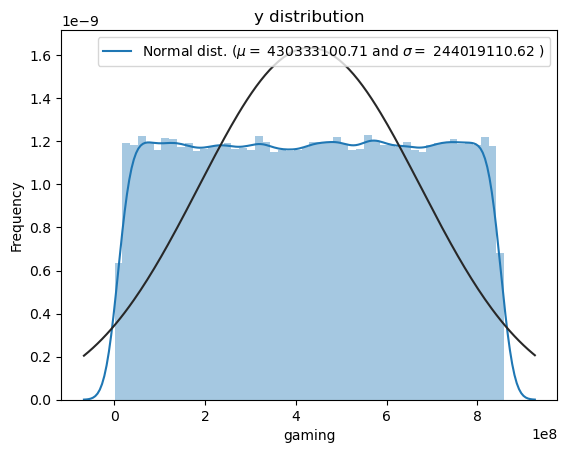

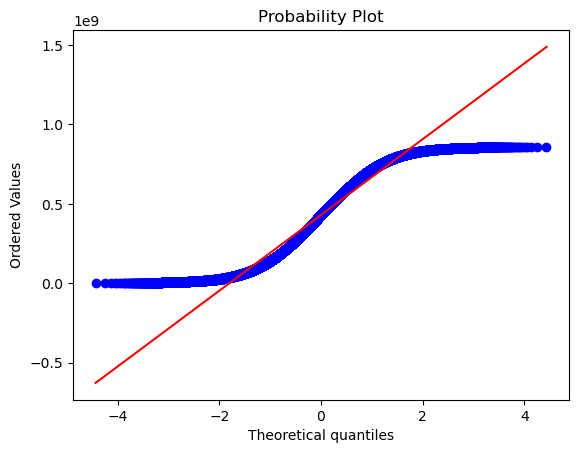

In [54]:
sns.distplot(df1['gaming'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['gaming'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['gaming'], plot=plt)
plt.show()


 mu = 104609105.55 and sigma = 81037071.33



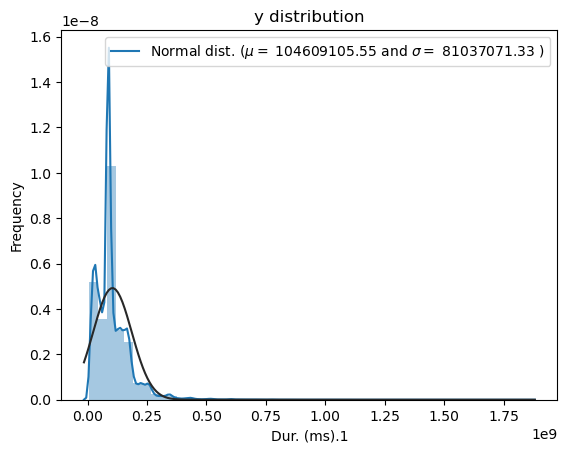

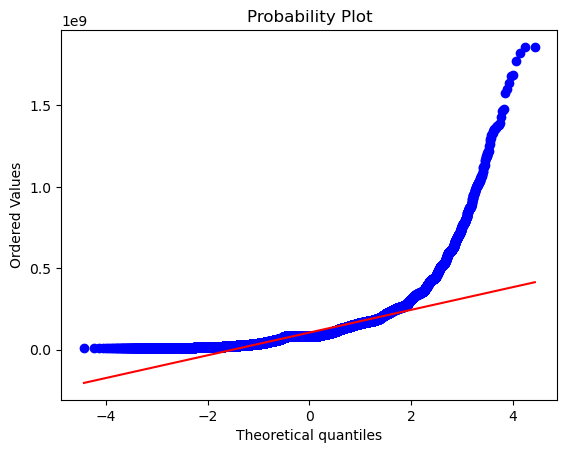

In [55]:
# xdr ms
sns.distplot(df1['Dur. (ms).1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['Dur. (ms).1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['Dur. (ms).1'], plot=plt)
plt.show()

In [56]:
# data['total'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
# sns.barplot(x = data['social_media'], y = data['total'])

biv_data = df1[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_bytes', 'other']]
# adding a summation row in all columns
biv_data.loc['totals'] = biv_data.sum()
biv_data.tail()

,social_media,google,email,youtube,netflix,gaming,total_bytes,other
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.057839e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,6.276986e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,4.015220e+08,8.161200e+08
150000,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.957646e+08,4.293653e+08
totals,2.742394e+11,1.171102e+12,3.388676e+11,3.396545e+12,3.394314e+12,6.455040e+13,7.436519e+13,6.440523e+13


Text(0.5, 0, 'application')

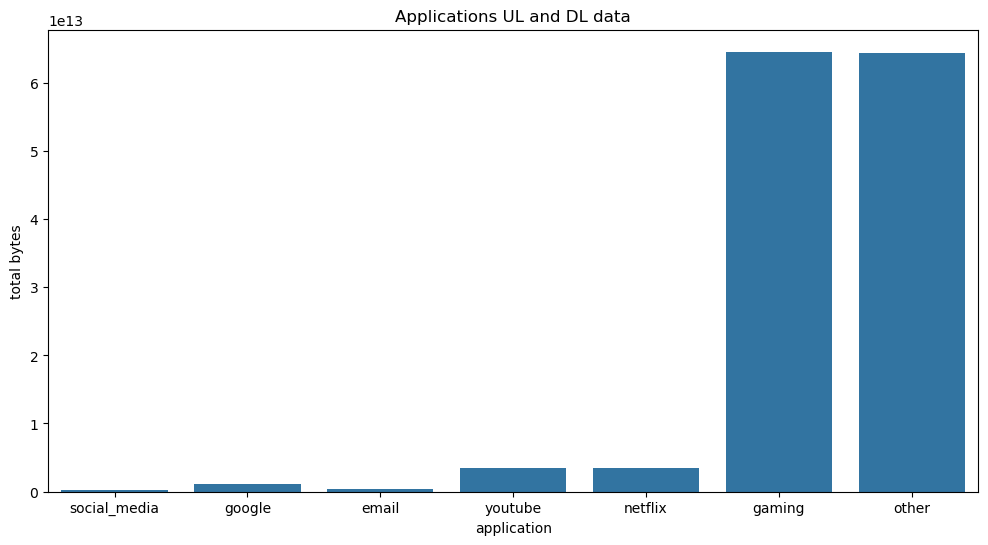

In [57]:
a = biv_data.tail(1)
long_df = pd.melt(a)
long_df = long_df.drop([6], axis  = 0)
plt.figure(figsize=(12,6))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('Applications UL and DL data')
plt.ylabel('total bytes')
plt.xlabel('application')

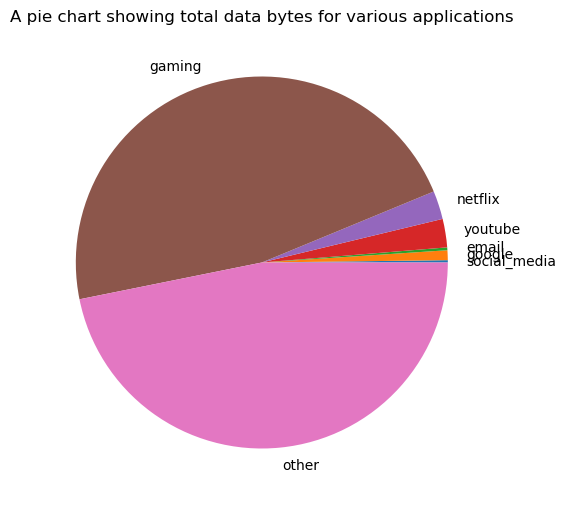

In [58]:
fig = plt.figure(figsize =(6, 7)) 
a = biv_data.drop(['total_bytes'], axis = 1)
plt.pie(a.loc['totals'], labels = a.columns)
plt.title('A pie chart showing total data bytes for various applications')
plt.show()

#### Correlation Analysis

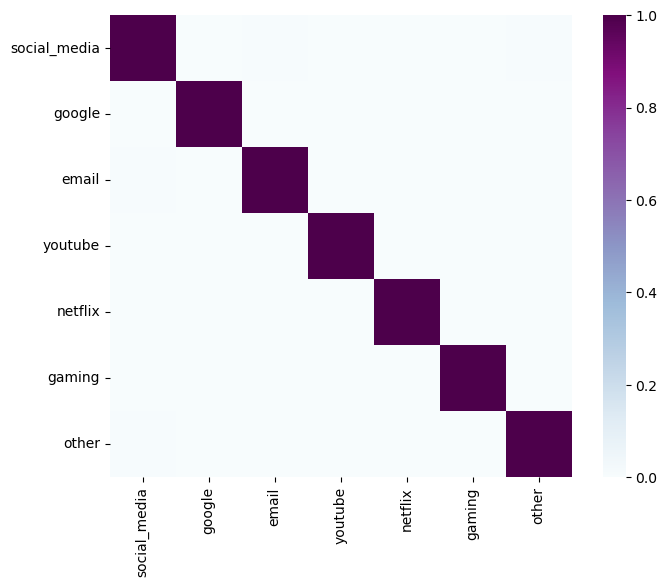

In [60]:
corr_data = df1[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

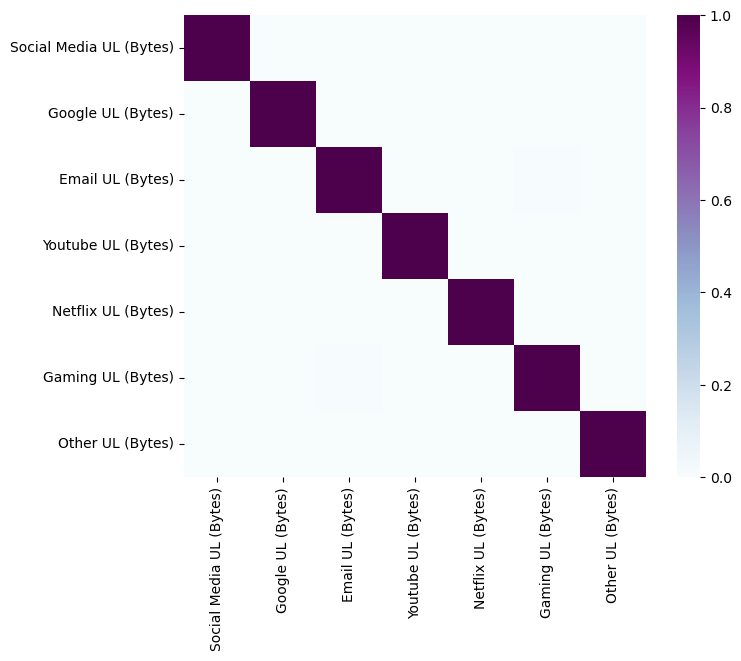

In [61]:
# On the upload bytes
corr_data = df1[['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

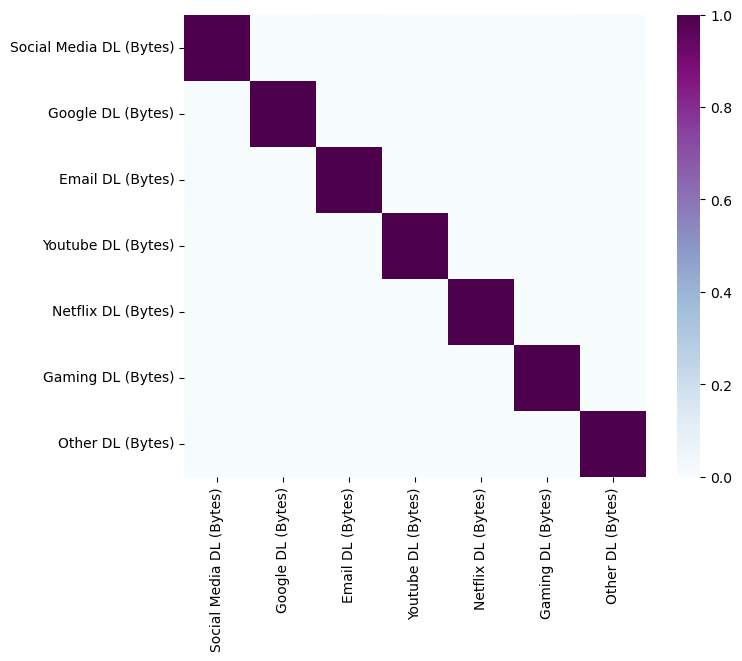

In [62]:
# On the download bytes
corr_data = df1[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

#### Dimensionality Reduction

In [64]:
# standardize the data
from sklearn.preprocessing import StandardScaler


new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in df1.columns:
    if df1[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)
        
seg = df1[new_numerical].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) #drop the id col
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)

In [65]:
scaled_data.shape

(150001, 65)

In [66]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [67]:
pca.explained_variance_ratio_

array([1.23857268e-01, 7.69070518e-02, 6.40492160e-02, 4.62942103e-02,
       4.06488996e-02, 3.91696432e-02, 3.13414665e-02, 3.10484061e-02,
       3.09637264e-02, 3.08577563e-02, 3.07536286e-02, 3.05627421e-02,
       3.03275064e-02, 2.56550510e-02, 2.55144971e-02, 2.29697282e-02,
       2.24104595e-02, 2.14746699e-02, 1.72488276e-02, 1.63712234e-02,
       1.55323404e-02, 1.54867973e-02, 1.54071175e-02, 1.53770242e-02,
       1.53582611e-02, 1.52681512e-02, 1.52292115e-02, 1.49618778e-02,
       1.48093525e-02, 1.40657718e-02, 1.35090976e-02, 1.15308950e-02,
       1.12456266e-02, 9.49470432e-03, 8.15012049e-03, 7.49896334e-03,
       6.48568631e-03, 5.79248506e-03, 4.43585925e-03, 4.27082349e-03,
       2.71981284e-03, 2.39093969e-03, 1.24337552e-03, 9.81783439e-04,
       2.53475560e-04, 6.04775046e-05, 1.39907755e-05, 1.15229651e-13,
       1.01390427e-26, 2.91254248e-31, 1.47996734e-31, 6.08271994e-32,
       5.58474981e-32, 3.74005177e-32, 3.22894009e-32, 2.40022315e-32,
      

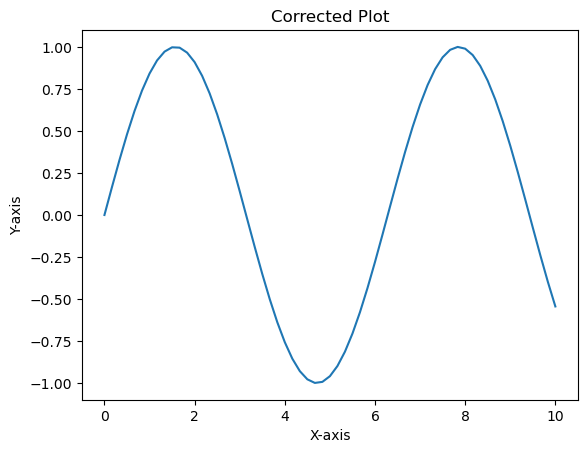

In [351]:
x = np.linspace(0, 10, 61)  
y = np.sin(x)                

plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Corrected Plot")
plt.show()

In [111]:
pca = PCA(n_components = 23)
pca.fit(scaled_data)

PCA(n_components=23)

In [112]:
pca_scores = pca.transform(scaled_data)
pca_scores

array([[-3.73044919,  1.38853396, -3.97123311, ..., -0.02200775,
         0.56010141,  0.7162708 ],
       [-3.03603288, -1.87846822, -2.0883771 , ...,  1.692552  ,
         0.38959035, -1.20657355],
       [-3.04531096,  1.73592165, -2.05442479, ...,  0.35429321,
         0.26749069, -0.05667208],
       ...,
       [-1.3451702 , -1.2047911 , -3.36511951, ..., -0.91337512,
        -0.56309387, -0.9838287 ],
       [-0.93585872,  0.84245135, -3.40457814, ...,  0.24755426,
         1.54210623, -0.87579455],
       [-0.01969687, -0.0040746 , -3.29706589, ...,  0.00806731,
        -0.01427445,  0.00460111]])

In [115]:
# new_data_df = pd.concat([seg.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
# c.columns.values[-2:] = ['component1', 'component2']
# new_data_df.head() #contains the original cols 

a = pd.DataFrame(pca_scores)
a['MSISDN/Number'] = df1['MSISDN/Number']
a.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,MSISDN/Number
0,-3.730449,1.388534,-3.971233,4.968663,10.559128,0.586455,-0.095355,-3.022088,-11.186370,-0.869085,...,-21.946762,3.492149,-0.995671,-0.925166,1.134021,-0.350338,-0.022008,0.560101,0.716271,3.366496e+10
1,-3.036033,-1.878468,-2.088377,3.762119,7.537708,4.172254,1.259153,-2.734866,-6.798605,-2.822697,...,-16.173573,2.439967,0.970251,-0.773969,-0.238557,-0.113971,1.692552,0.389590,-1.206574,3.368185e+10
2,-3.045311,1.735922,-2.054425,3.841787,7.939135,1.168353,1.195050,-2.596530,-8.228909,-1.271333,...,-16.182453,2.323920,2.385625,-0.849189,-0.924876,-0.015060,0.354293,0.267491,-0.056672,3.376063e+10
3,-3.026474,-3.558698,-1.905709,3.720293,7.704649,1.721401,2.525006,-2.726288,-7.173151,-3.991449,...,-15.595907,2.444388,0.088445,-0.720146,-0.749424,0.045290,-0.459426,-0.147081,-0.499536,3.375034e+10
4,-2.669933,-0.979497,-0.916269,3.178014,6.478420,1.201812,1.617017,-2.064504,-6.028263,-2.878962,...,-12.650008,1.861427,0.555911,-0.567310,1.248008,0.021923,1.674436,-1.107033,1.209963,3.369980e+10


<Axes: xlabel='0', ylabel='1'>

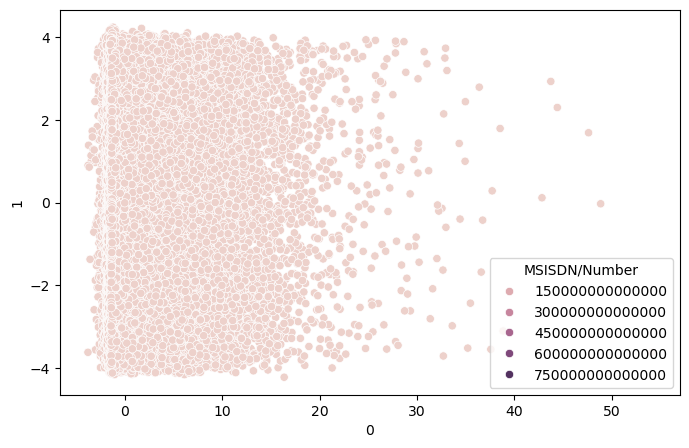

In [121]:
#plotting the first 2 components since they explain most of the variability.
plt.figure(figsize=(8,5))
sns.scatterplot(x= a[0], y = a[1], hue = a['MSISDN/Number'])

 # 2.User Engagement Analysis

#### Sessions frequency, sessions duration, sessions total traffic.

In [126]:
user_data = df1[['MSISDN/Number', 'total_bytes', 'Dur. (ms).1', 'Bearer Id']]

In [128]:
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_bytes': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


Text(0.5, 1.0, 'a barplot indicating 10 users with highest number of sessions')

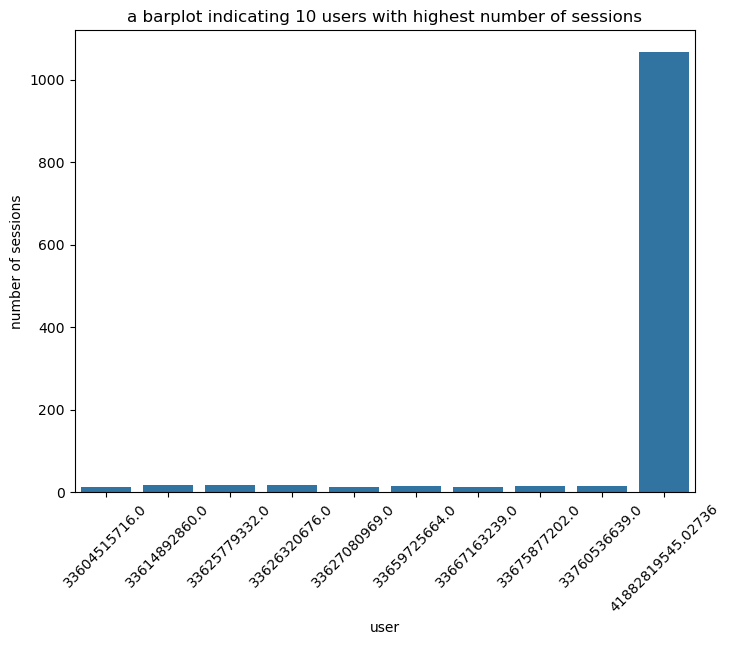

In [130]:
a = agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = a.index, y = a['sessions_freq'])
plt.ylabel('number of sessions')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest number of sessions')

Text(0.5, 1.0, 'a barplot indicating 10 users with highest sessions traffic')

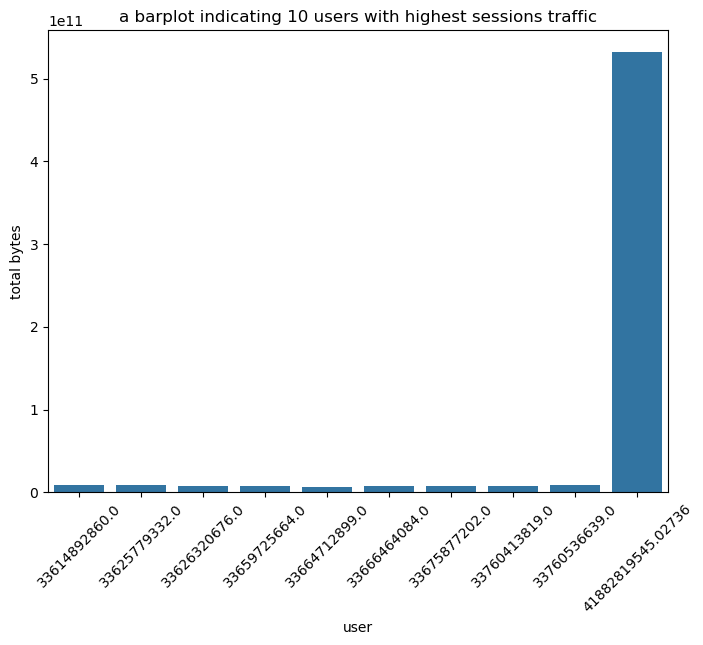

In [132]:
b = agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = b.index, y = b['sessions_traffic(bytes)'])
plt.ylabel('total bytes')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest sessions traffic')

Text(0.5, 1.0, 'a barplot indicating 10 users with longest sessions duration')

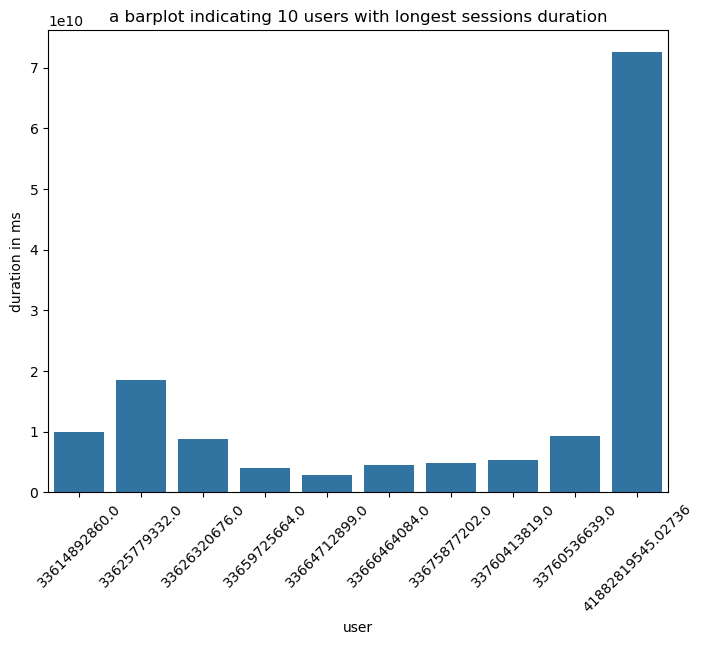

In [134]:
c = agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = b.index, y = b['sessions_duration(ms)'])
plt.ylabel('duration in ms')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with longest sessions duration')

In [136]:
# users in the 3 categories.
a = a.index.to_list()
b = b.index.to_list()
c = c.index.to_list()

def IntersecOfSets(arr1, arr2, arr3): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 

    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3) 
      
    final_list = list(result_set) 
    print(final_list) 
  
IntersecOfSets(a, b, c) 

[33625779332.0, 33626320676.0, 41882819545.02736, 33614892860.0, 33760536639.0]


In [138]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927


In [335]:
norm_agg_user_data.shape

(106857, 4)

In [337]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)
kmeans_data

array([0, 1, 0, ..., 1, 0, 1])

In [339]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score,clusters
MSISDN/Number,,,,,
3.360100e+10,0.693147,18.575290,20.593943,0.683839,0
3.360100e+10,0.693147,19.015283,18.870862,1.826052,1
3.360100e+10,0.693147,18.720558,20.205695,0.719548,0
3.360101e+10,0.693147,17.725091,19.861276,1.685264,1
3.360101e+10,1.098612,17.429248,21.099927,1.799325,2


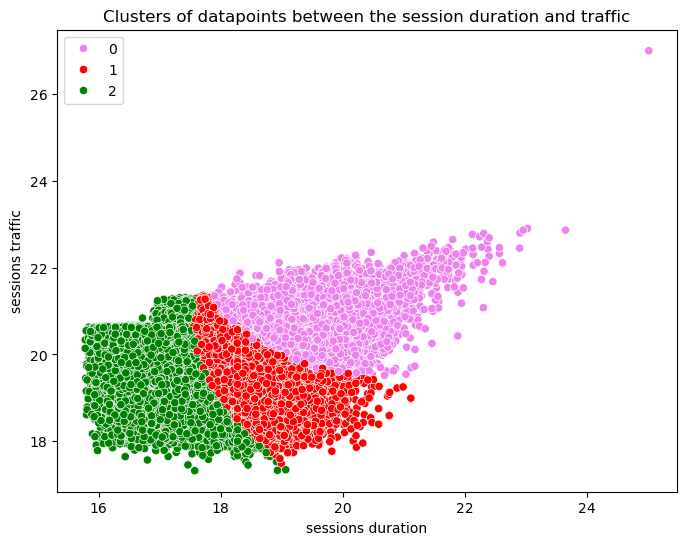

In [341]:
# comparing the clusters in variable pairs

# duration and traffic
x = norm_agg_user_data[['sessions_duration(ms)', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (8,6))
sns.scatterplot(x = norm_agg_user_data['sessions_duration(ms)'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session duration and traffic')
plt.xlabel('sessions duration')
plt.ylabel('sessions traffic')
plt.legend()

<Axes: >

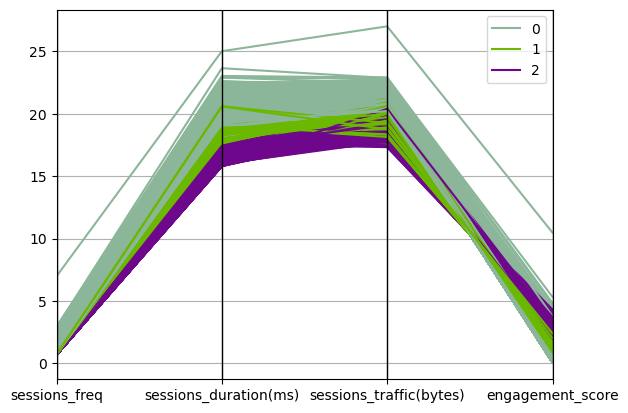

In [342]:
pd.plotting.parallel_coordinates(norm_agg_user_data, 'clusters')

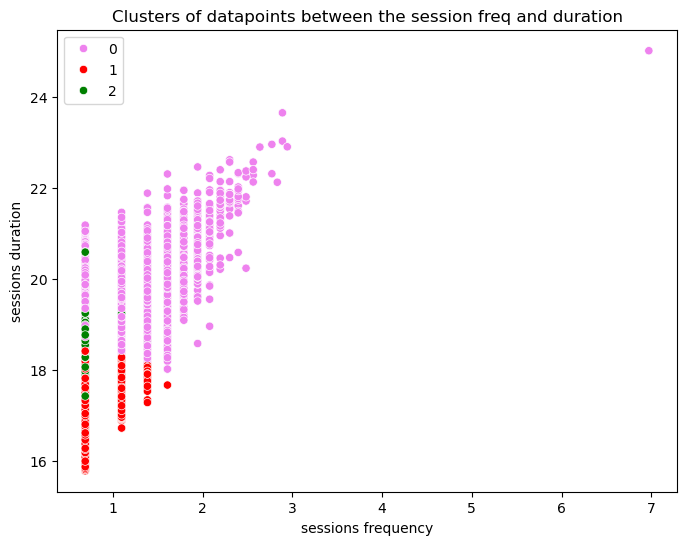

In [147]:
# comparing the clusters in variable pairs

# frequency and duration
x = norm_agg_user_data[['sessions_freq', 'sessions_duration(ms)', 'clusters']]
plt.figure(figsize = (8,6))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_duration(ms)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()

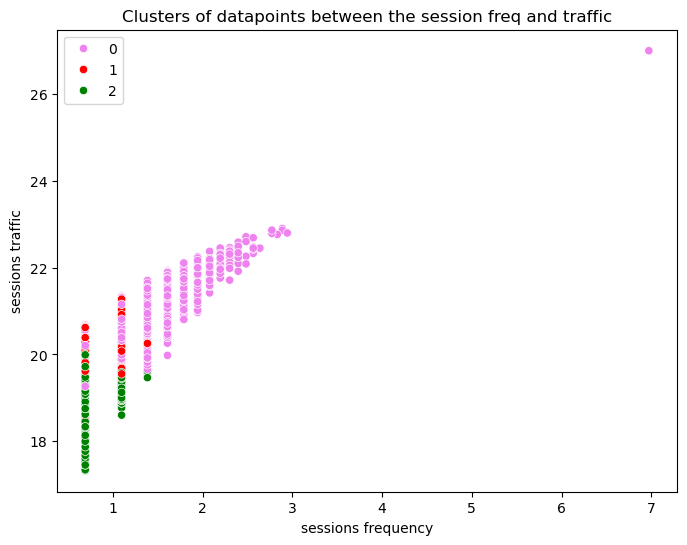

In [149]:
# comparing the clusters in variable pairs

# frequency and traffic
x = norm_agg_user_data[['sessions_freq', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (8,6))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and traffic')
plt.xlabel('sessions frequency')
plt.ylabel('sessions traffic')
plt.legend()

In [152]:
# add the clusters column to the non normalized data
agg_user_data['clusters'] = kmeans_data
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,0
3.360100e+10,1,181230963.0,1.568596e+08,2
3.360100e+10,1,134969374.0,5.959665e+08,0
3.360101e+10,1,49878024.0,4.223207e+08,1
3.360101e+10,2,37104453.0,1.457411e+09,1


In [154]:
agg_user_data.clusters.value_counts()

clusters
0    39722
1    38523
2    28612
Name: count, dtype: int64

In [156]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]   #get observations under cluster 1
# cluster_1.loc['total_per_metric'] = cluster_1.sum()             #get the totals per metric
print(cluster_1.shape)
cluster_1.tail()

(39722, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378996e+10,1,1.570699e+08,7.102876e+08,0
3.378998e+10,2,2.103901e+08,1.094693e+09,0
4.188282e+10,1066,7.255155e+10,5.317447e+11,0
3.197021e+12,1,8.773853e+08,2.321240e+08,0
3.370000e+14,1,2.530302e+08,5.962878e+08,0


In [158]:
cluster_1.describe() # get the min, max and average per metric in cluster 2

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,39722.00000,3.972200e+04,3.972200e+04,39722.0
mean,1.95534,2.544392e+08,1.062835e+09,0.0
std,5.44738,4.492786e+08,2.721158e+09,0.0
min,1.00000,6.659556e+07,1.770069e+08,0.0
25%,1.00000,1.491170e+08,6.807656e+08,0.0
50%,2.00000,1.853585e+08,8.735833e+08,0.0
75%,2.00000,2.795536e+08,1.280620e+09,0.0
max,1066.00000,7.255155e+10,5.317447e+11,0.0


In [160]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]   #get observations under cluster 2
# cluster_2.loc['total_per_metric'] = cluster_2.sum()             #get the totals per metric
print(cluster_2.shape)
cluster_2.tail()

(38523, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378991e+10,1,44199417.0,902088414.0,1
3.378991e+10,1,98294048.0,534066910.0,1
3.378992e+10,1,54339643.0,576824365.0,1
3.378996e+10,1,98826284.0,645777687.0,1
3.379000e+10,1,8810688.0,714641641.0,1


In [162]:
cluster_2.describe() # get the min, max and average per metric in cluster 2

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,38523.000000,3.852300e+04,3.852300e+04,38523.0
mean,1.112374,5.593215e+07,6.444320e+08,1.0
std,0.319264,2.901072e+07,2.436750e+08,0.0
min,1.000000,7.142988e+06,7.051602e+07,1.0
25%,1.000000,2.871578e+07,4.880104e+08,1.0
50%,1.000000,5.461318e+07,6.407455e+08,1.0
75%,1.000000,8.639990e+07,7.954079e+08,1.0
max,4.000000,1.130871e+08,2.034468e+09,1.0


In [164]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]   #get observations under cluster 3
# cluster_3.loc['total_per_metric'] = cluster_3.sum()             #get the totals per metric
print(cluster_3.shape)
cluster_3.tail()

(28612, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378991e+10,1,86399921.0,366089210.0,2
3.378994e+10,1,36812757.0,193917233.0,2
3.378997e+10,1,160461578.0,208123067.0,2
3.379000e+10,1,140988659.0,480307335.0,2
8.823971e+14,1,869844200.0,139153646.0,2


In [166]:
cluster_3.describe() # get the min, max and average per metric in cluster 3

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,28612.000000,2.861200e+04,2.861200e+04,28612.0
mean,1.030302,1.198785e+08,2.558993e+08,2.0
std,0.171827,6.038505e+07,1.157003e+08,0.0
min,1.000000,8.550664e+06,3.324901e+07,2.0
25%,1.000000,8.639991e+07,1.560280e+08,2.0
50%,1.000000,1.032405e+08,2.479563e+08,2.0
75%,1.000000,1.489732e+08,3.487405e+08,2.0
max,3.000000,1.035262e+09,5.446107e+08,2.0


In [168]:
apps_traffic = df1[['social_media', 'netflix', 'youtube', 'google', 'email', 'gaming', 'other', 'MSISDN/Number']]
apps_traffic.tail()

,social_media,netflix,youtube,google,email,gaming,other,MSISDN/Number
149996,3.517065e+06,37561864.00,27955095.00,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07,3.365069e+10
149997,2.352181e+06,40643294.00,22165518.00,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08,3.366345e+10
149998,1.260239e+06,15029702.00,24516413.00,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08,3.362189e+10
149999,8.231090e+05,16494842.00,17122508.00,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08,3.361962e+10
150000,1.828250e+06,22628606.54,22643482.63,7.807295e+06,2.259102e+06,4.303331e+08,4.293653e+08,4.188282e+10


In [170]:
agg_apps_traffic = df1.groupby('MSISDN/Number').agg({'social_media':'sum', 'netflix':'sum', 'youtube':'sum', 'gaming':'sum', 
                                                            'google':'sum', 'email':'sum', 'other':'sum'})
agg_apps_traffic.head()

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,386570872.0
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,281710071.0
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,501693672.0
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,35279702.0
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,804804484.0


Text(0.5, 1.0, 'a barplot indicating 10 users with highest social_media traffic')

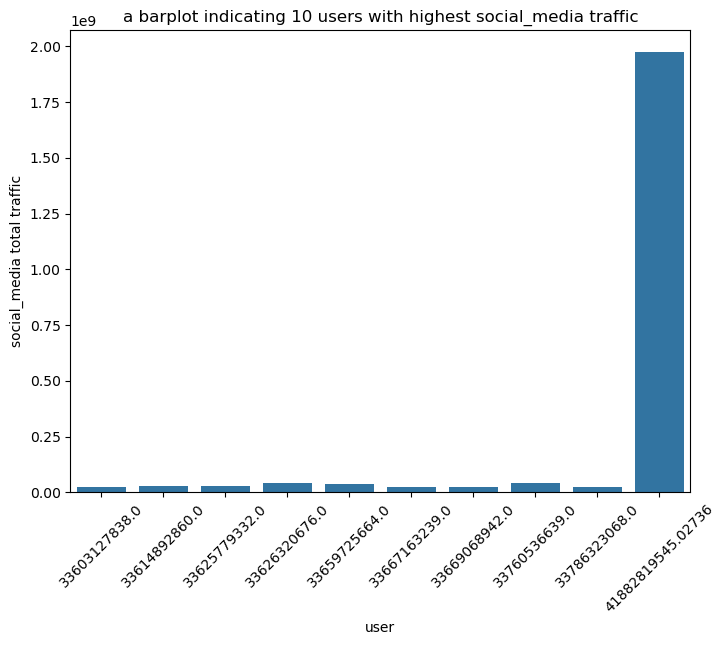

In [172]:
b = agg_apps_traffic.sort_values(by = 'social_media', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = b.index, y = b['social_media'])
plt.ylabel('social_media total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest social_media traffic')

Text(0.5, 1.0, 'a barplot indicating 10 users with highest netflix traffic')

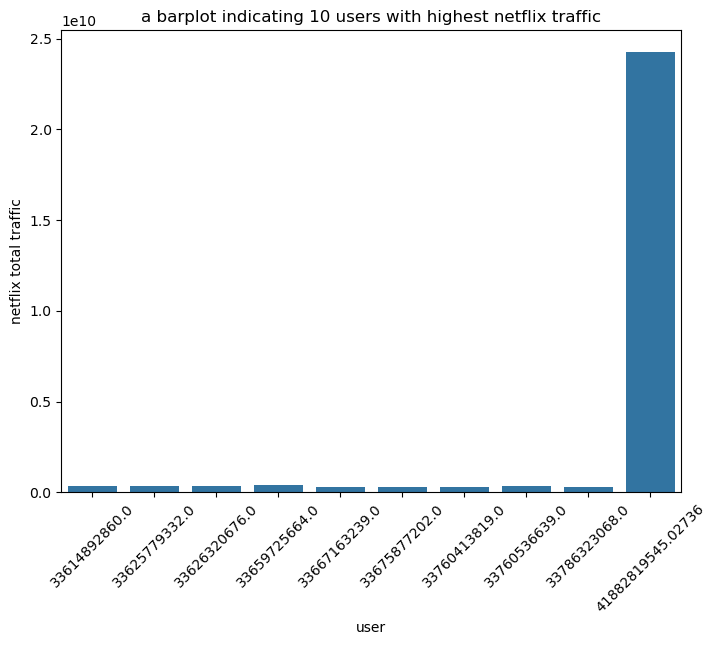

In [173]:
c = agg_apps_traffic.sort_values(by = 'netflix', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = c.index, y = c['netflix'])
plt.ylabel('netflix total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest netflix traffic')

Text(0.5, 1.0, 'a barplot indicating 10 users with highest gaming traffic')

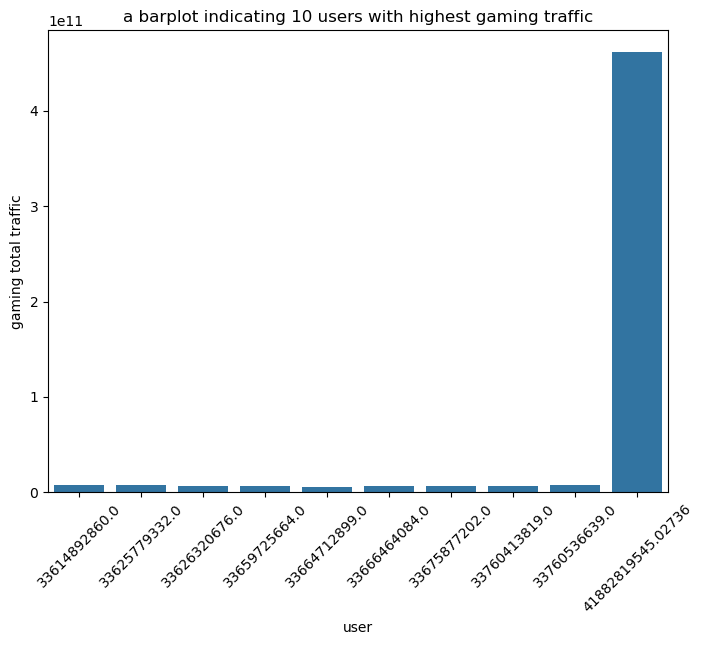

In [176]:
d = agg_apps_traffic.sort_values(by = 'gaming', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = d.index, y = d['gaming'])
plt.ylabel('gaming total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest gaming traffic')

In [177]:
# Plot the top 3 most used applications using appropriate charts.   
agg_apps_traffic.loc['total_app_traffic'] = agg_apps_traffic.sum()  
agg_apps_traffic.tail()

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
41882819545.027359,1.973817e+09,2.425357e+10,2.434073e+10,4.614780e+11,8.248577e+09,2.399880e+09,4.509784e+11
3197020876596.0,7.152240e+05,2.659230e+07,1.195990e+07,1.780487e+08,1.043866e+07,1.520771e+06,4.705265e+08
337000037000919.0,5.215660e+05,3.090504e+07,3.673494e+07,5.101427e+08,9.830617e+06,3.318582e+06,1.491884e+08
882397108489451.0,1.546088e+06,2.884623e+07,4.094071e+07,4.307026e+07,9.218647e+06,3.330974e+06,4.013605e+08
total_app_traffic,2.742394e+11,3.394314e+12,3.396545e+12,6.455040e+13,1.171102e+12,3.388676e+11,6.440523e+13


Text(0.5, 0, 'application')

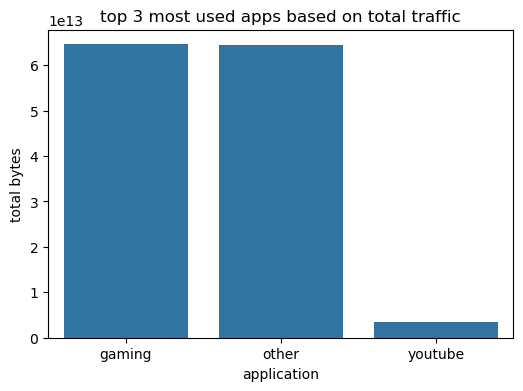

In [180]:
a = agg_apps_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(6,4))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')

#### * Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

In [183]:
# the user engagement metrics df (already normalized due to different units of measurement)
norm_agg_user_data = norm_agg_user_data.drop(['clusters'], axis = 1)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927


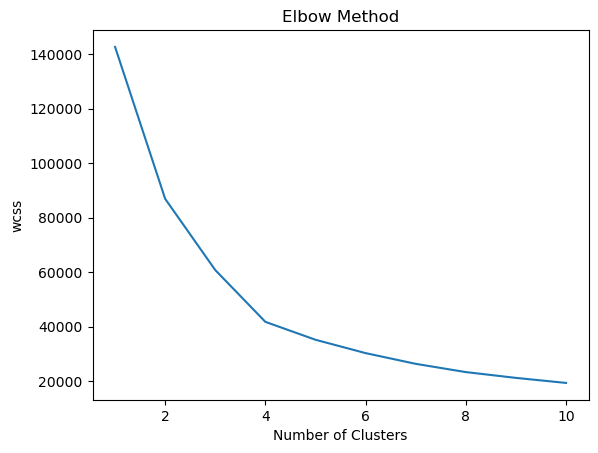

In [185]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_user_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [186]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,0
3.360100e+10,1,181230963.0,1.568596e+08,3
3.360100e+10,1,134969374.0,5.959665e+08,0
3.360101e+10,1,49878024.0,4.223207e+08,1
3.360101e+10,2,37104453.0,1.457411e+09,1


In [189]:
#clusters df1
cluster_1 = agg_user_data[agg_user_data.clusters == 0]
cluster_2 = agg_user_data[agg_user_data.clusters == 1]
cluster_3 = agg_user_data[agg_user_data.clusters == 2]
cluster_4 = agg_user_data[agg_user_data.clusters == 3]

In [191]:
# descriptions
cluster_1.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,46138.000000,4.613800e+04,4.613800e+04,46138.0
mean,1.192770,1.174443e+08,6.867858e+08,0.0
std,0.402904,4.481643e+07,2.315831e+08,0.0
min,1.000000,4.160388e+07,3.463538e+08,0.0
25%,1.000000,8.639991e+07,5.120211e+08,0.0
50%,1.000000,1.020788e+08,6.640130e+08,0.0
75%,1.000000,1.481041e+08,8.152333e+08,0.0
max,4.000000,3.518824e+08,2.287800e+09,0.0


In [193]:
# descriptions
cluster_2.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,19372.000000,1.937200e+04,1.937200e+04,19372.0
mean,1.071030,2.869734e+07,5.458530e+08,1.0
std,0.257885,1.144201e+07,2.611232e+08,0.0
min,1.000000,7.142988e+06,4.604748e+07,1.0
25%,1.000000,1.923894e+07,3.419606e+08,1.0
50%,1.000000,2.802951e+07,5.347992e+08,1.0
75%,1.000000,3.682105e+07,7.381824e+08,1.0
max,3.000000,5.910590e+07,1.789204e+09,1.0


In [195]:
# descriptions
cluster_3.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,20313.000000,2.031300e+04,2.031300e+04,20313.0
mean,2.590459,3.502448e+08,1.363434e+09,2.0
std,7.549469,6.117278e+08,3.774483e+09,0.0
min,1.000000,8.307244e+07,1.770069e+08,2.0
25%,2.000000,2.091965e+08,9.112549e+08,2.0
50%,2.000000,2.725166e+08,1.212436e+09,2.0
75%,3.000000,3.730848e+08,1.599830e+09,2.0
max,1066.000000,7.255155e+10,5.317447e+11,2.0


In [197]:
# descriptions
cluster_4.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,21034.000000,2.103400e+04,2.103400e+04,21034.0
mean,1.026956,1.237225e+08,2.095928e+08,3.0
std,0.162546,6.736007e+07,8.204483e+07,0.0
min,1.000000,1.886284e+07,3.324901e+07,3.0
25%,1.000000,8.639989e+07,1.380796e+08,3.0
50%,1.000000,1.009836e+08,2.093212e+08,3.0
75%,1.000000,1.534621e+08,2.814172e+08,3.0
max,3.000000,1.042254e+09,3.538151e+08,3.0


# 3.Experience Analytics

##### Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable) -(jupyter notebook): Average TCP retransmission Average RTT Handset type Average throughput

In [201]:
net_data = df1[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

net_data.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811
3,3.375034e+10,undefined,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811


In [203]:
# check the outliers using IQR score

#check if the exist
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = o.unique()

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False  True]
rtt ul [False  True]
tp ul [False  True]
tp dl [False  True]
tcp dl [False  True]
tcp ul [False  True]


In [347]:
df.shape
net_data.shape

(150001, 11)

In [207]:
net_data['Avg RTT DL (ms)'] = net_data['Avg RTT DL (ms)'].clip(lower=net_data['Avg RTT DL (ms)'].quantile(0.07), upper=net_data['Avg RTT DL (ms)'].quantile(0.93))
net_data['Avg RTT UL (ms)'] = net_data['Avg RTT UL (ms)'].clip(lower=net_data['Avg RTT UL (ms)'].quantile(0.10), upper=net_data['Avg RTT UL (ms)'].quantile(0.90))
net_data['Avg Bearer TP DL (kbps)'] = net_data['Avg Bearer TP DL (kbps)'].clip(lower=net_data['Avg Bearer TP DL (kbps)'].quantile(0.05), upper=net_data['Avg Bearer TP DL (kbps)'].quantile(0.95))
net_data['Avg Bearer TP UL (kbps)'] = net_data['Avg Bearer TP UL (kbps)'].clip(lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.20), upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.80))
net_data['TCP UL Retrans. Vol (Bytes)'] = net_data['TCP UL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.95))
net_data['TCP DL Retrans. Vol (Bytes)'] = net_data['TCP DL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.95))

In [209]:
# Confirming they've been treated
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = np.unique(o, return_counts = True)

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False]
rtt ul [False]
tp ul (array([False]), array([150001], dtype=int64))
tp dl [False]
tcp dl [False]
tcp ul [False]


In [211]:
# replacing it from the mean
mean = float(net_data['Avg Bearer TP UL (kbps)'].mean())
lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.10)
upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.90)
net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  > upper), mean, net_data['Avg Bearer TP UL (kbps)'])
net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  < lower), mean, net_data['Avg Bearer TP UL (kbps)'])

In [213]:
# generate total columns for rtt, tp and tcp
net_data['total_tp(kbps)'] = df1['Avg Bearer TP DL (kbps)'] + df1['Avg Bearer TP UL (kbps)']
net_data['total_rtt(ms)'] = df1['Avg RTT DL (ms)'] + df1['Avg RTT UL (ms)']
net_data['total_tcp(bytes)'] = df1['TCP DL Retrans. Vol (Bytes)'] + df1['TCP UL Retrans. Vol (Bytes)']
net_data.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,45.0,2.080991e+07,759658.664811,67.0,47.000000,2.156957e+07
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,45.0,2.080991e+07,759658.664811,42.0,70.000000,2.156957e+07
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,11.0,45.0,2.080991e+07,759658.664811,15.0,127.458589,2.156957e+07
3,3.375034e+10,undefined,109.795706,17.662883,44.0,45.0,2.080991e+07,759658.664811,88.0,127.458589,2.156957e+07
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,11.0,45.0,2.080991e+07,759658.664811,15.0,127.458589,2.156957e+07


In [215]:
# aggregating

# handset type
a = net_data[['MSISDN/Number', 'Handset Type']]
b = a.groupby('MSISDN/Number').count()
print(b.shape)
b = b.reset_index()
b.head()

(106857, 1)


,MSISDN/Number,Handset Type
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [217]:
c = net_data.drop(['Handset Type'], axis = 1)
d = c.groupby('MSISDN/Number').sum()
d = d.reset_index()
print(d.shape)
d.head()

(106857, 10)


,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.360100e+10,46.000000,1.000000,37.0,45.0,2.080991e+07,759658.664811,76.0,46.000000,2.156957e+07
1,3.360100e+10,30.000000,1.000000,48.0,51.0,2.080991e+07,759658.664811,99.0,31.000000,2.156957e+07
2,3.360100e+10,109.795706,17.662883,48.0,49.0,2.080991e+07,759658.664811,97.0,127.458589,2.156957e+07
3,3.360101e+10,69.000000,15.000000,204.0,45.0,4.316000e+03,759658.664811,248.0,84.000000,7.607247e+05
4,3.360101e+10,114.000000,6.000000,40395.0,1673.0,3.015954e+07,780860.664811,56844.0,119.000000,3.094040e+07


In [219]:
# Merging them
agg_net_data = pd.merge(left=b, right=d, how='left', left_on='MSISDN/Number', right_on='MSISDN/Number')
print(agg_net_data.shape)
agg_net_data.head()

(106857, 11)


,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.360100e+10,1,46.000000,1.000000,37.0,45.0,2.080991e+07,759658.664811,76.0,46.000000,2.156957e+07
1,3.360100e+10,1,30.000000,1.000000,48.0,51.0,2.080991e+07,759658.664811,99.0,31.000000,2.156957e+07
2,3.360100e+10,1,109.795706,17.662883,48.0,49.0,2.080991e+07,759658.664811,97.0,127.458589,2.156957e+07
3,3.360101e+10,1,69.000000,15.000000,204.0,45.0,4.316000e+03,759658.664811,248.0,84.000000,7.607247e+05
4,3.360101e+10,2,114.000000,6.000000,40395.0,1673.0,3.015954e+07,780860.664811,56844.0,119.000000,3.094040e+07


#### a. TCP values in the dataset.  
#### b. RTT values in the dataset. 
#### c. Throughput values in the dataset. 

In [221]:
#tcp
tcp = df1.sort_values(by = 'total_tcp', ascending = False)
top_tcp = tcp.total_tcp.head(10)
bottom_tcp = tcp.total_tcp.tail(10)
fre_tcp = df1.total_tcp.value_counts(ascending = False).head(10)
print('top tcp\n', top_tcp.to_list())
print('bottom tcp\n', bottom_tcp.to_list())
print('freq tcp\n', fre_tcp.index.to_list())

top tcp
 [4344115651.0, 4301477439.0, 4294431965.0, 4291464950.0, 4288120860.0, 4275491713.0, 4268647350.0, 4261616039.0, 4260174145.0, 4254659643.0]
bottom tcp
 [143.0, 134.0, 134.0, 129.0, 128.0, 113.0, 108.0, 106.0, 97.0, 86.0]
freq tcp
 [21569572.935152996, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 759750.6648110661, 20811232.27034193, 762318.6648110661, 760976.6648110661, 20812574.27034193]


In [223]:
#rtt
rtt = df1.sort_values(by = 'total_rtt', ascending = False)
top_rtt= rtt.total_rtt.head(10)
bottom_rtt = rtt.total_rtt.tail(10)
fre_rtt = df1.total_rtt.value_counts(ascending = False).head(10)
print('top rtt\n', top_rtt.to_list())
print('bottom rtt\n', bottom_rtt.to_list())
print('freq rtt\n', fre_rtt.index.to_list())

top rtt
 [96924.0, 64641.0, 55812.0, 54848.0, 27278.0, 26300.0, 25922.0, 25715.0, 25388.0, 24738.0]
bottom rtt
 [6.0, 6.0, 5.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0]
freq rtt
 [127.4585889646606, 29.0, 39.0, 38.0, 40.0, 30.0, 28.0, 49.0, 41.0, 31.0]


In [225]:
tp = df1.sort_values(by = 'total_tp', ascending = False)
top_tp = tp.total_tp.head(10)
bottom_tp = tp.total_tp.tail(10)
fre_tp = df1.total_tp.value_counts(ascending = False).head(10)
print('top tp\n', top_tp.to_list())
print('bottom tp\n', bottom_tp.to_list())
print('freq tp\n', fre_tp.index.to_list())

top tp
 [382262.0, 313244.0, 304299.0, 300546.0, 283931.0, 281144.0, 277152.0, 276205.0, 274052.0, 269888.0]
bottom tp
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
freq tp
 [63.0, 15.0, 97.0, 90.0, 98.0, 96.0, 99.0, 89.0, 91.0, 93.0]


In [227]:
# user-based plots on the same

# tcp
top_tcp_values = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).head(10)
bottom_tcp_values = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).tail(10)
most_frequent_tcp_values = pd.DataFrame(agg_net_data['total_tcp(bytes)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 TCP values'), Text(0.5, 0, 'users')]

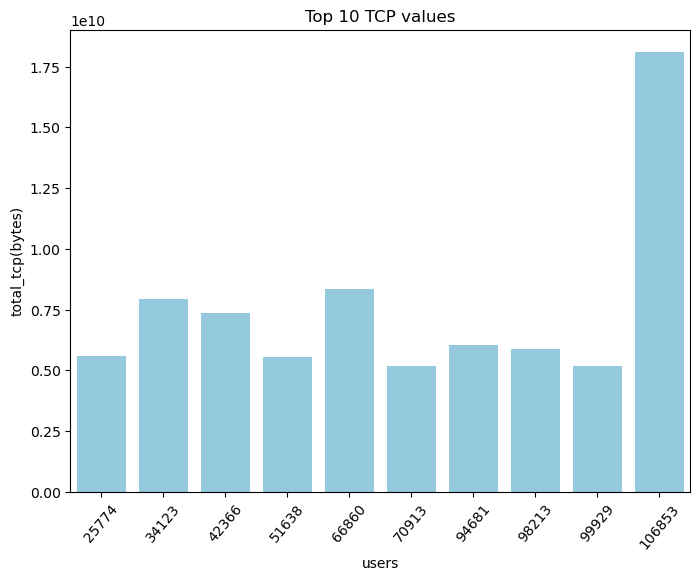

In [229]:
# top 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = top_tcp_values.index ,y = top_tcp_values['total_tcp(bytes)'], color="skyblue").set(title = 'Top 10 TCP values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 TCP values'), Text(0.5, 0, 'users')]

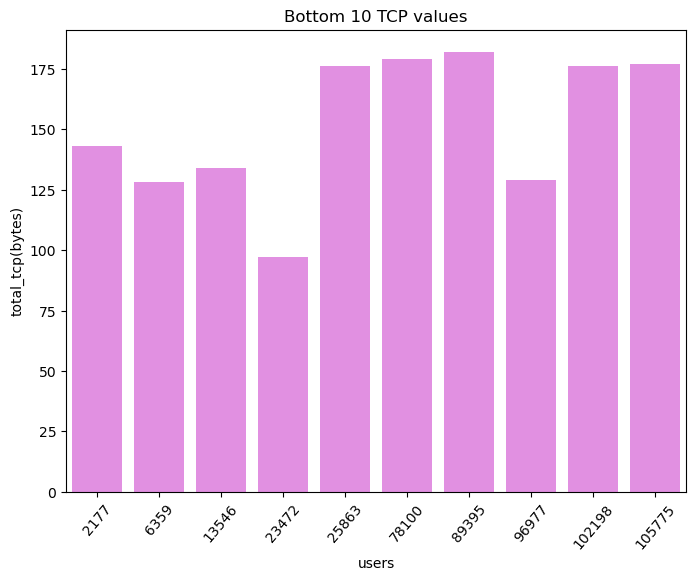

In [231]:
# bottom 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = bottom_tcp_values.index ,y = bottom_tcp_values['total_tcp(bytes)'], color="violet").set(title = 'Bottom 10 TCP values', xlabel = 'users')

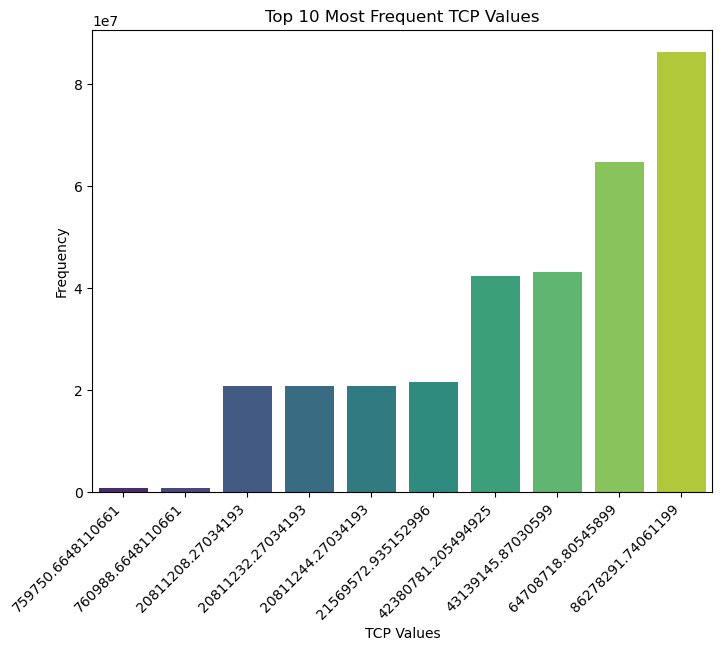

In [233]:
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_frequent_tcp_values.index, y='total_tcp(bytes)', data=most_frequent_tcp_values, palette="viridis")
plt.title('Top 10 Most Frequent TCP Values')
plt.xlabel('TCP Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [235]:
# rtt
top_rtt_values= agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).head(10)
bottom_rtt_values = agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).tail(10)
most_frequent_rtt_values = pd.DataFrame(agg_net_data['total_rtt(ms)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 rtt values'), Text(0.5, 0, 'users')]

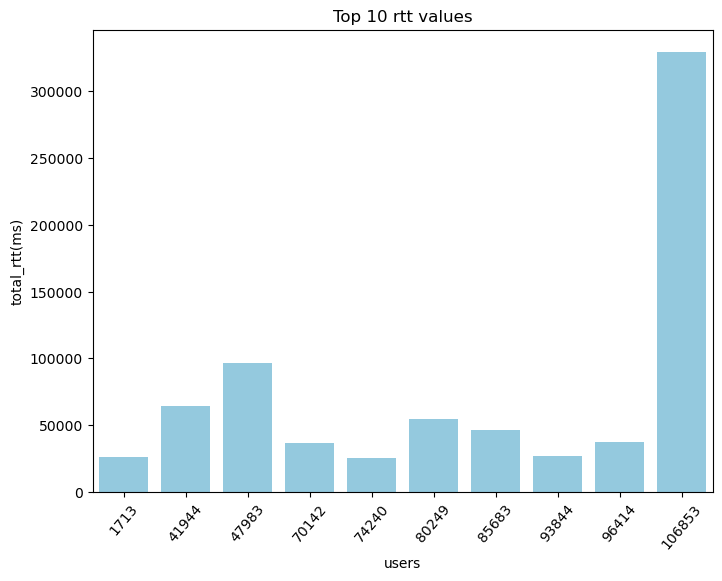

In [237]:
# top 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = top_rtt_values.index ,y = top_rtt_values['total_rtt(ms)'], color="skyblue").set(title = 'Top 10 rtt values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 rtt values'), Text(0.5, 0, 'users')]

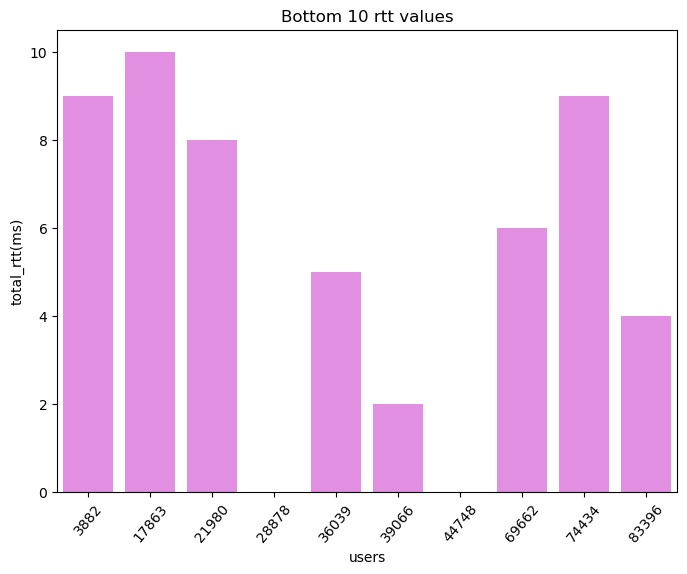

In [239]:
# bottom 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = bottom_rtt_values.index ,y = bottom_rtt_values['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 rtt values', xlabel = 'users')

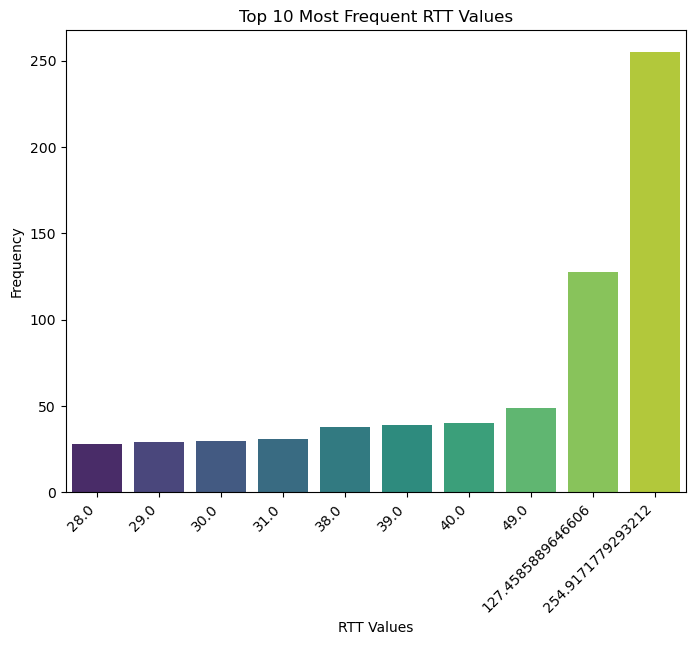

In [241]:
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_frequent_rtt_values.index, y='total_rtt(ms)', data=most_frequent_rtt_values, palette="viridis")
plt.title('Top 10 Most Frequent RTT Values')
plt.xlabel('RTT Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [243]:
# tp
top_tp_values = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).head(10)
bottom_tp_values = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).tail(10)
most_frequent_tp_values = pd.DataFrame(agg_net_data['total_tp(kbps)'].value_counts(ascending = False).head(10))
bottom_tp_values

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
40346,3.366050e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
27067,3.365096e+10,2,219.591412,35.325766,22.0,90.0,4.161983e+07,1.519317e+06,0.0,254.917178,4.313915e+07
19036,3.363841e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
85825,3.369859e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
90941,3.375292e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
103186,3.377746e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
103236,3.377776e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
40785,3.366062e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
71456,3.366923e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
1204,3.360413e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07


[Text(0.5, 1.0, 'Top 10 tp values'), Text(0.5, 0, 'users')]

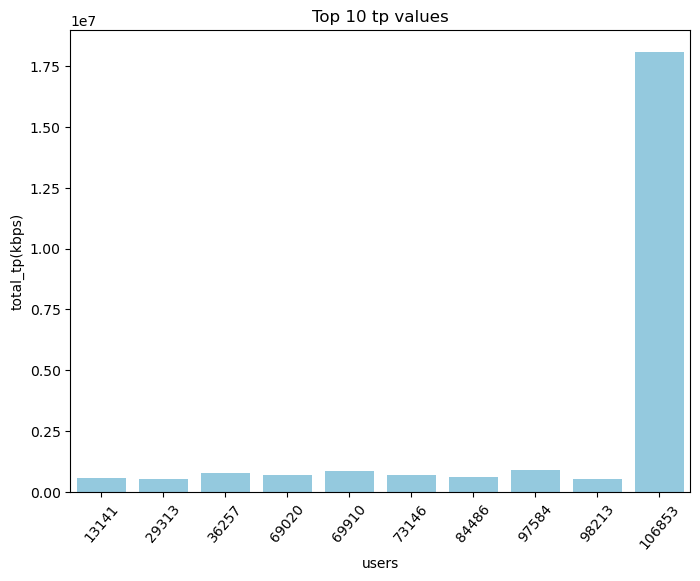

In [245]:
# top 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = top_tp_values.index ,y = top_tp_values['total_tp(kbps)'], color="skyblue").set(title = 'Top 10 tp values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 tp values'), Text(0.5, 0, 'users')]

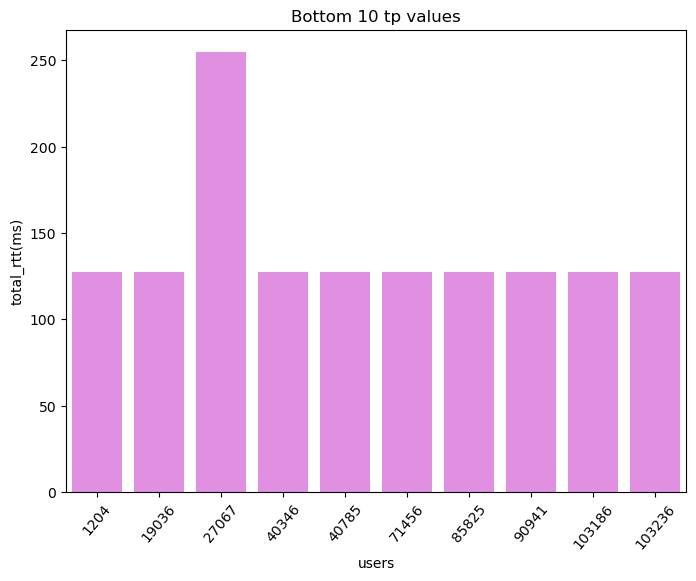

In [247]:
# bottom 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = bottom_tp_values.index ,y = bottom_tp_values['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 tp values', xlabel = 'users')

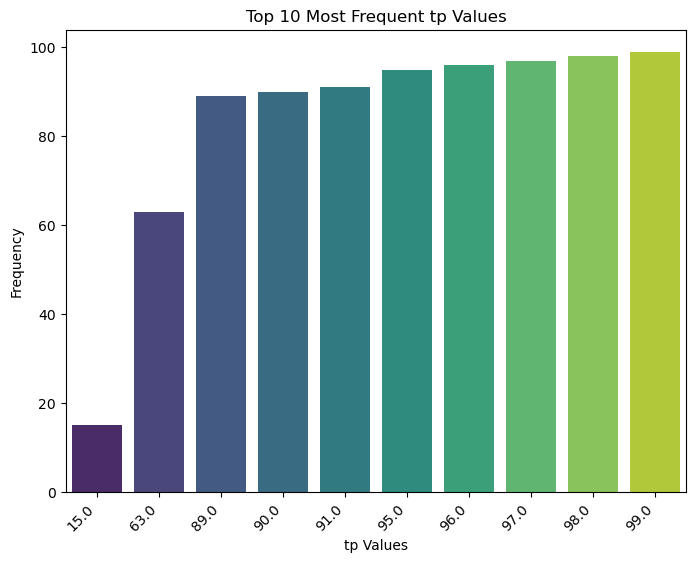

In [249]:
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_frequent_tp_values.index, y='total_tp(kbps)', data=most_frequent_tp_values, palette="viridis")
plt.title('Top 10 Most Frequent tp Values')
plt.xlabel('tp Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [251]:
df1['total_tp(kbps)'] = df1['Avg Bearer TP DL (kbps)'] + df1['Avg Bearer TP UL (kbps)']
df1['total_rtt(ms)'] = df1['Avg RTT DL (ms)'] + df1['Avg RTT UL (ms)']
df1['total_tcp(bytes)'] = df1['TCP DL Retrans. Vol (Bytes)'] + df1['TCP UL Retrans. Vol (Bytes)']

handset_data = df1[['Handset Type', 'total_tp(kbps)', 'total_tcp(bytes)']]
agg_handset_data = handset_data.groupby('Handset Type').mean()
agg_handset_data.columns = ['avg_tp_per_set', 'avg_tcp_per_set']
agg_handset_data.head()

,avg_tp_per_set,avg_tcp_per_set
Handset Type,,
A-Link Telecom I. Cubot A5,23510.0,2.156957e+07
A-Link Telecom I. Cubot Note Plus,6699.0,6.162130e+05
A-Link Telecom I. Cubot Note S,8937.0,4.141173e+07
A-Link Telecom I. Cubot Nova,56217.0,1.371700e+05
A-Link Telecom I. Cubot Power,69468.0,8.041000e+03



 mu = 12400.38 and sigma = 14661.81



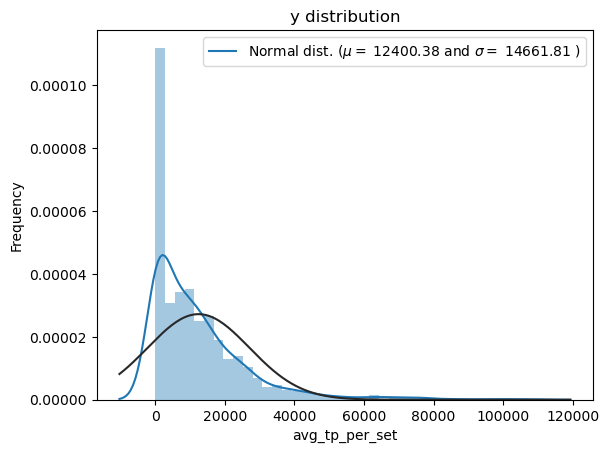

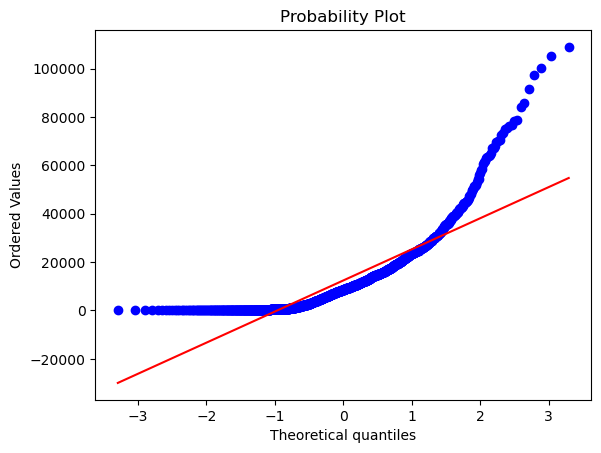

In [253]:
# Average throughput/handset ~ distribution
sns.distplot(agg_handset_data['avg_tp_per_set'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(agg_handset_data['avg_tp_per_set'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(agg_handset_data['avg_tp_per_set'], plot=plt)
plt.show()

[Text(0.5, 1.0, 'Top 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

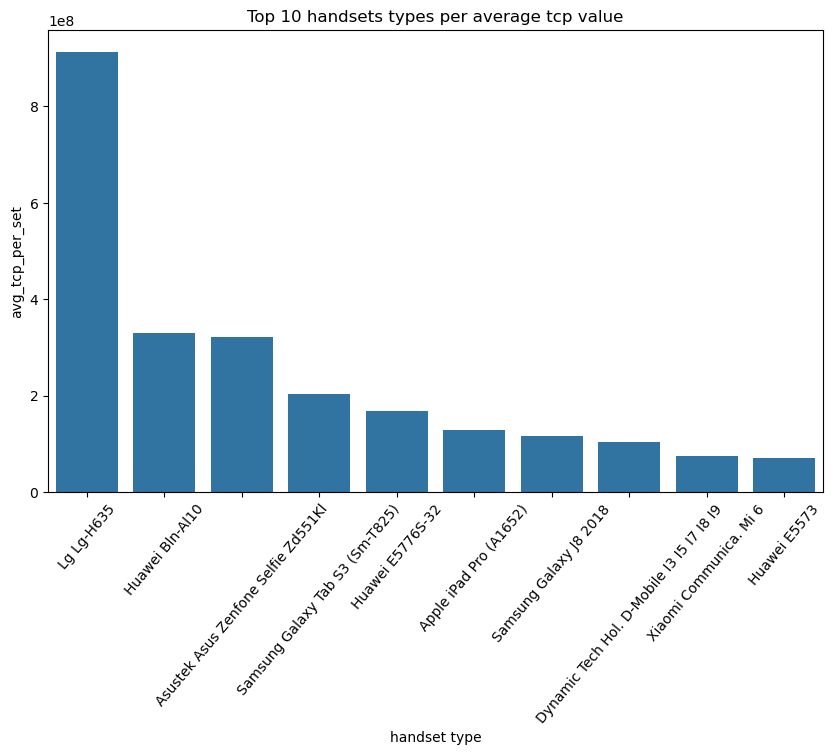

In [254]:
# The average TCP retransmission view per handset type and provide interpretation for your findings.
# aggregate function has already been applied 

# top 10 handsets per tcp average
a = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).head(10)

plt.figure(figsize = (10,6))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['avg_tcp_per_set']).set(title = 'Top 10 handsets types per average tcp value', xlabel = 'handset type')

[Text(0.5, 1.0, 'Bottom 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

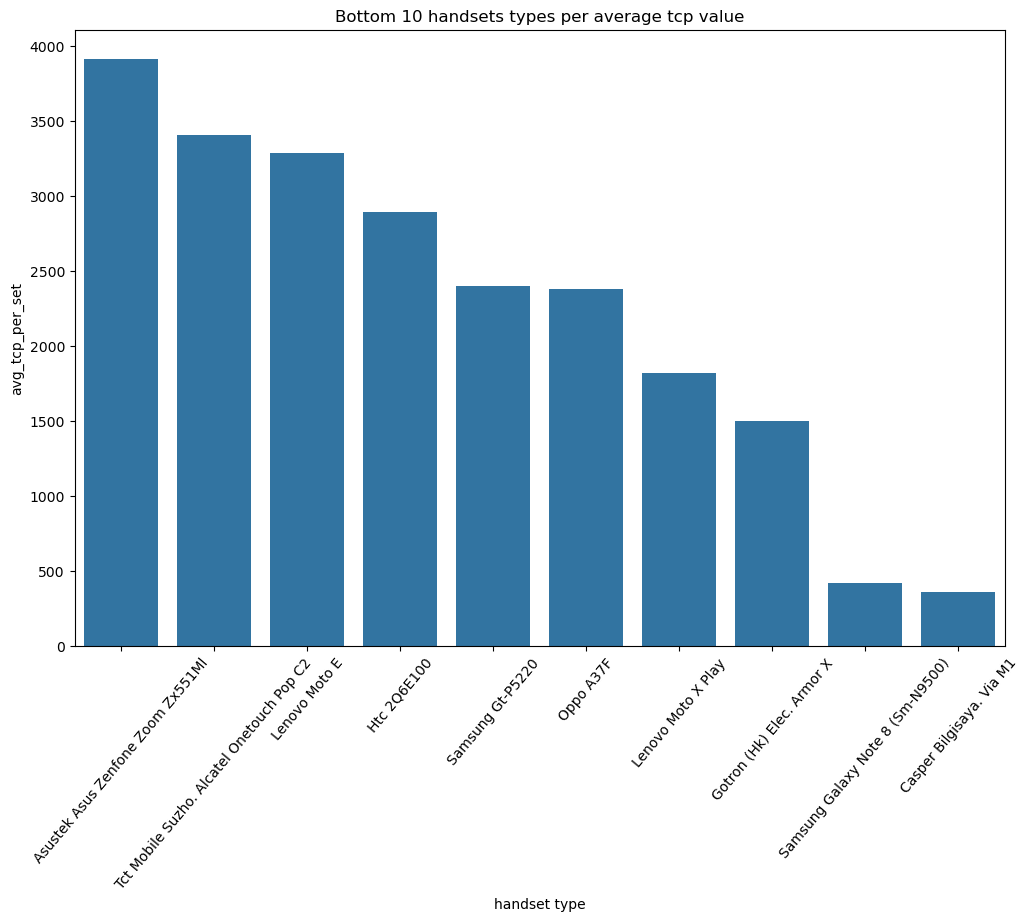

In [257]:
# bottom 10 handsets per tcp average
b = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).tail(10)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['avg_tcp_per_set']).set(title = 'Bottom 10 handsets types per average tcp value', xlabel = 'handset type')

In [259]:
cluster_data = agg_net_data[['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)',  'total_tcp(bytes)']]
norm_cluster_data = np.log1p(cluster_data)   #log transformation
norm_cluster_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,0.693147,4.343805,3.850148,16.886794
1,0.693147,4.605170,3.465736,16.886794
2,0.693147,4.584967,4.855607,16.886794
3,0.693147,5.517453,4.442651,13.542028
4,1.098612,10.948084,4.787492,17.247574


In [261]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_cluster_data)
kmeans_data = kmeans.predict(norm_cluster_data)

In [263]:
# add the predicted clusters as a column in the df
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
0,1,76.0,46.000000,2.156957e+07,1
1,1,99.0,31.000000,2.156957e+07,1
2,1,97.0,127.458589,2.156957e+07,1
3,1,248.0,84.000000,7.607247e+05,1
4,2,56844.0,119.000000,3.094040e+07,0


In [265]:
#clusters df
cluster_1 = cluster_data[cluster_data.clusters == 0]
cluster_2 = cluster_data[cluster_data.clusters == 1]
cluster_3 = cluster_data[cluster_data.clusters == 2]

In [267]:
# understand the clusters
cluster_1.describe()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
count,28940.000000,2.894000e+04,28940.000000,2.894000e+04,28940.0
mean,2.057636,6.014967e+04,266.002908,6.097682e+07,0.0
std,6.357878,1.223090e+05,2002.192625,3.102842e+08,0.0
min,1.000000,1.157000e+03,17.000000,1.183841e+06,0.0
25%,1.000000,1.969475e+04,88.000000,1.080377e+07,0.0
50%,2.000000,4.286350e+04,149.000000,2.187979e+07,0.0
75%,2.000000,7.666925e+04,261.458589,3.490999e+07,0.0
max,1066.000000,1.807823e+07,329526.164724,1.810492e+10,0.0


In [269]:
# understand the clusters
cluster_2.describe()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
count,57867.000000,57867.000000,57867.000000,5.786700e+04,57867.0
mean,1.199181,161.199008,121.934653,2.522595e+07,1.0
std,0.500237,238.588215,721.290566,1.163534e+07,0.0
min,1.000000,0.000000,0.000000,2.398920e+05,1.0
25%,1.000000,77.000000,38.000000,2.156957e+07,1.0
50%,1.000000,99.000000,69.000000,2.156957e+07,1.0
75%,1.000000,132.000000,127.458589,2.156957e+07,1.0
max,9.000000,2340.000000,96924.000000,5.395976e+08,1.0


In [271]:
# understand the clusters
cluster_3.describe()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
count,20050.000000,20050.000000,20050.000000,2.005000e+04,20050.0
mean,1.050374,25462.671920,217.695715,5.505430e+05,2.0
std,0.247399,27976.354147,702.654298,5.070238e+05,0.0
min,1.000000,38.000000,19.000000,9.700000e+01,2.0
25%,1.000000,4776.000000,49.000000,7.432125e+04,2.0
50%,1.000000,16970.000000,72.000000,4.905455e+05,2.0
75%,1.000000,36855.250000,154.000000,7.920037e+05,2.0
max,5.000000,382871.000000,27278.000000,3.340765e+06,2.0


# 4.Satisfaction Analysis 

####  Write a Python program to assign:

engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

In [275]:
norm_agg_user_data

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927
...,...,...,...
3.379000e+10,0.693147,18.764190,19.989937
4.188282e+10,6.972606,25.007563,26.999429
3.197021e+12,0.693147,20.592457,19.262782


In [277]:
# Identifying the least engaged cluster
norm_agg_user_data.value_counts()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
0.693147       15.781642              20.140470                  1
               19.045334              20.406289                  1
               19.049076              20.516276                  1
               19.049013              20.319206                  1
               19.048976              20.124144                  1
                                                                ..
               18.274498              20.286424                  1
                                      20.258675                  1
                                      20.258532                  1
                                      20.252458                  1
6.972606       25.007563              26.999429                  1
Name: count, Length: 106857, dtype: int64

In [279]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(norm_agg_user_data) #returns euclidean distance btwn all datapoints and each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_2 = dist_df.iloc[:, 0].to_list() #pick out the centroid 2 distances
print(len(dist_2))
dist_2[:10]

106857


[0.683838520249975,
 1.8260518154679262,
 0.7195480939240748,
 1.6852635041458415,
 1.7993248133121909,
 0.4666540898710277,
 0.623212976250634,
 1.410729957334567,
 0.854432183925614,
 0.6701586903383338]

In [281]:
norm_agg_user_data['engagement_score'] = dist_2
eng_scores_data = norm_agg_user_data
eng_scores_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score
MSISDN/Number,,,,
3.360100e+10,0.693147,18.575290,20.593943,0.683839
3.360100e+10,0.693147,19.015283,18.870862,1.826052
3.360100e+10,0.693147,18.720558,20.205695,0.719548
3.360101e+10,0.693147,17.725091,19.861276,1.685264
3.360101e+10,1.098612,17.429248,21.099927,1.799325


In [283]:
# picking out the 4 cols
exp_data = net_data.drop(['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
                          'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], axis = 1)
exp_data.head()

,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,67.0,47.000000,2.156957e+07
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),42.0,70.000000,2.156957e+07
2,3.376063e+10,Samsung Galaxy A8 (2018),15.0,127.458589,2.156957e+07
3,3.375034e+10,undefined,88.0,127.458589,2.156957e+07
4,3.369980e+10,Samsung Sm-G390F,15.0,127.458589,2.156957e+07


In [285]:
# groupby user
agg_exp_data = exp_data.groupby('MSISDN/Number').agg({'Handset Type':'count', 'total_tp(kbps)':'sum', 'total_rtt(ms)':'sum', 'total_tcp(bytes)':'sum'})
agg_exp_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes)
MSISDN/Number,,,,
3.360100e+10,1,76.0,46.000000,2.156957e+07
3.360100e+10,1,99.0,31.000000,2.156957e+07
3.360100e+10,1,97.0,127.458589,2.156957e+07
3.360101e+10,1,248.0,84.000000,7.607247e+05
3.360101e+10,2,56844.0,119.000000,3.094040e+07


In [287]:
# normalize and perform kmeans
norm_agg_exp_data = np.log1p(agg_exp_data)
norm_agg_exp_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes)
MSISDN/Number,,,,
3.360100e+10,0.693147,4.343805,3.850148,16.886794
3.360100e+10,0.693147,4.605170,3.465736,16.886794
3.360100e+10,0.693147,4.584967,4.855607,16.886794
3.360101e+10,0.693147,5.517453,4.442651,13.542028
3.360101e+10,1.098612,10.948084,4.787492,17.247574


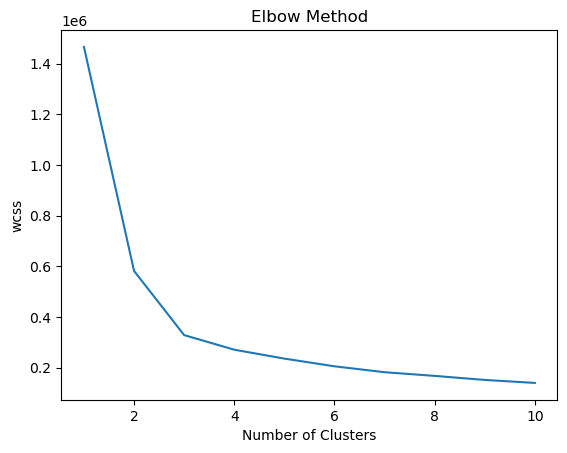

In [289]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_exp_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [291]:
# fit kmeans and identify least engaged cluster
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
k_means.fit(norm_agg_exp_data)
clusters=k_means.predict(norm_agg_exp_data)

norm_agg_exp_data['clusters'] = clusters
norm_agg_exp_data.clusters.value_counts()

clusters
1    57867
0    28940
2    20050
Name: count, dtype: int64

In [293]:
# fit kmeans


km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(norm_agg_user_data) #returns euclidean distance btwn all datapoints to each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_0 = dist_df.iloc[:, 2].to_list() #pick out the centroid 0 distances
print(len(dist_0))
dist_0[:10]

106857


[2.3862904283920114,
 2.160709100528315,
 2.3490373400459896,
 0.9274218198661578,
 1.5436592395504167,
 3.0027030822173395,
 2.4352753692008515,
 1.5124373490397232,
 3.432964478804539,
 2.381135424046548]

In [295]:
# add the scores to the df
norm_agg_exp_data['experience_score'] = dist_0
exp_scores_data = norm_agg_exp_data.drop(['clusters'], axis = 1)
exp_scores_data.tail()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score
MSISDN/Number,,,,,
3.379000e+10,0.693147,4.762174,3.713572,16.886794,2.256927
4.188282e+10,6.972606,16.710219,12.705414,23.619449,14.801800
3.197021e+12,0.693147,0.693147,4.855607,16.886794,3.520356
3.370000e+14,0.693147,3.526361,4.855607,16.886794,2.894276
8.823971e+14,0.693147,1.098612,4.855607,16.886794,3.601085


In [297]:
print(exp_scores_data.shape)
print(eng_scores_data.shape)

(106857, 5)
(106857, 4)


In [299]:
exp_scores_data = exp_scores_data.reset_index()
eng_scores_data = eng_scores_data.reset_index()
avg_score_df = pd.merge(left = exp_scores_data, right = eng_scores_data, left_on = 'MSISDN/Number', right_on = 'MSISDN/Number')
print(avg_score_df.shape)
avg_score_df.tail()

(106857, 10)


,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score
106852,3.379000e+10,0.693147,4.762174,3.713572,16.886794,2.256927,0.693147,18.764190,19.989937,0.850335
106853,4.188282e+10,6.972606,16.710219,12.705414,23.619449,14.801800,6.972606,25.007563,26.999429,10.472167
106854,3.197021e+12,0.693147,0.693147,4.855607,16.886794,3.520356,0.693147,20.592457,19.262782,2.019237
106855,3.370000e+14,0.693147,3.526361,4.855607,16.886794,2.894276,0.693147,19.349019,20.206234,0.586840
106856,8.823971e+14,0.693147,1.098612,4.855607,16.886794,3.601085,0.693147,20.583825,18.751089,2.396911


In [301]:
#calculate the average score
avg_score_df['satisfaction_score'] = (avg_score_df['experience_score'] + avg_score_df['engagement_score'])/2
avg_score_df.head()

,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score,satisfaction_score
0,3.360100e+10,0.693147,4.343805,3.850148,16.886794,2.386290,0.693147,18.575290,20.593943,0.683839,1.535064
1,3.360100e+10,0.693147,4.605170,3.465736,16.886794,2.160709,0.693147,19.015283,18.870862,1.826052,1.993380
2,3.360100e+10,0.693147,4.584967,4.855607,16.886794,2.349037,0.693147,18.720558,20.205695,0.719548,1.534293
3,3.360101e+10,0.693147,5.517453,4.442651,13.542028,0.927422,0.693147,17.725091,19.861276,1.685264,1.306343
4,3.360101e+10,1.098612,10.948084,4.787492,17.247574,1.543659,1.098612,17.429248,21.099927,1.799325,1.671492


[Text(0.5, 1.0, 'Top 10 Most satisfied users'), Text(0.5, 0, 'users')]

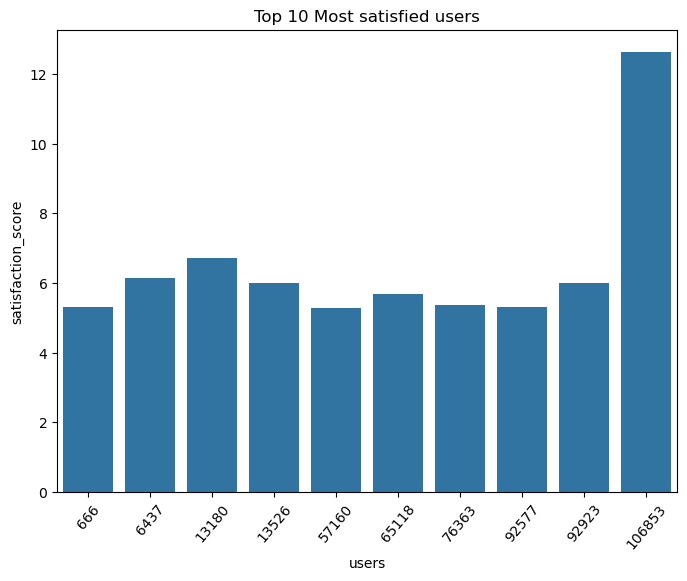

In [303]:
a = avg_score_df.sort_values(by = 'satisfaction_score', ascending = False).head(10)
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['satisfaction_score']).set(title = 'Top 10 Most satisfied users', xlabel = 'users')

In [305]:
all_variables = avg_score_df[['MSISDN/Number','engagement_score', 'experience_score', 'satisfaction_score']]
all_variables.head()

,MSISDN/Number,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,0.683839,2.386290,1.535064
1,3.360100e+10,1.826052,2.160709,1.993380
2,3.360100e+10,0.719548,2.349037,1.534293
3,3.360101e+10,1.685264,0.927422,1.306343
4,3.360101e+10,1.799325,1.543659,1.671492


In [307]:
# # features transformations
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)','total_tcp(bytes)', 'experience_score', 'sessions_freq',
               'sessions_duration(ms)', 'sessions_traffic(bytes)', 'engagement_score','satisfaction_score']

all_variables = logs(avg_score_df, log_features)
all_variables.head(5)

,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score,...,Handset Type_log,total_tp(kbps)_log,total_rtt(ms)_log,total_tcp(bytes)_log,experience_score_log,sessions_freq_log,sessions_duration(ms)_log,sessions_traffic(bytes)_log,engagement_score_log,satisfaction_score_log
0,3.360100e+10,0.693147,4.343805,3.850148,16.886794,2.386290,0.693147,18.575290,20.593943,0.683839,...,0.532478,1.677808,1.581069,2.884622,1.222684,0.532478,2.974779,3.072876,0.526997,0.934156
1,3.360100e+10,0.693147,4.605170,3.465736,16.886794,2.160709,0.693147,19.015283,18.870862,1.826052,...,0.532478,1.725472,1.498671,2.884622,1.153955,0.532478,2.996996,2.989758,1.042413,1.099738
2,3.360100e+10,0.693147,4.584967,4.855607,16.886794,2.349037,0.693147,18.720558,20.205695,0.719548,...,0.532478,1.721868,1.769106,2.884622,1.211654,0.532478,2.982169,3.054741,0.547860,0.933853
3,3.360101e+10,0.693147,5.517453,4.442651,13.542028,0.927422,0.693147,17.725091,19.861276,1.685264,...,0.532478,1.876017,1.696102,2.677730,0.661358,0.532478,2.930398,3.038374,0.991496,0.839990
4,3.360101e+10,1.098612,10.948084,4.787492,17.247574,1.543659,1.098612,17.429248,21.099927,1.799325,...,0.746030,2.481407,1.757425,2.904580,0.937527,0.746030,2.914481,3.096027,1.032944,0.986373


In [309]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
       res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
       res.columns.values[m] = l + '_sq'
       m += 1
       return res 

squared_features = ['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)','total_tcp(bytes)', 'experience_score', 'sessions_freq',
                    'sessions_duration(ms)', 'sessions_traffic(bytes)', 'engagement_score','satisfaction_score']

all_variables = squares(all_variables, squared_features)
print(all_variables.shape)
all_variables.head(2)

(106857, 22)


,MSISDN/Number,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),experience_score,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),engagement_score,...,total_tp(kbps)_log,total_rtt(ms)_log,total_tcp(bytes)_log,experience_score_log,sessions_freq_log,sessions_duration(ms)_log,sessions_traffic(bytes)_log,engagement_score_log,satisfaction_score_log,Handset Type_sq
0,3.360100e+10,0.693147,4.343805,3.850148,16.886794,2.386290,0.693147,18.575290,20.593943,0.683839,...,1.677808,1.581069,2.884622,1.222684,0.532478,2.974779,3.072876,0.526997,0.934156,0.480453
1,3.360100e+10,0.693147,4.605170,3.465736,16.886794,2.160709,0.693147,19.015283,18.870862,1.826052,...,1.725472,1.498671,2.884622,1.153955,0.532478,2.996996,2.989758,1.042413,1.099738,0.480453


In [311]:
# split  dataset into train and test sets
from sklearn.model_selection import train_test_split

x = all_variables.drop(['satisfaction_score'], axis = 1)
y = all_variables[['satisfaction_score']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 0)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('ytrain shape:', y_train.shape)
print('ytest shape:', y_test.shape)

xtrain shape: (74799, 21)
xtest shape: (32058, 21)
ytrain shape: (74799, 1)
ytest shape: (32058, 1)


In [313]:
# drop the user column from the xtrain. Save it in another df from the xtest set
x_train = x_train.drop(['MSISDN/Number'], axis = 1)
test_user = x_test[['MSISDN/Number']]
x_test = x_test.drop(['MSISDN/Number'], axis = 1)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('users df shape:', test_user.shape)

xtrain shape: (74799, 20)
xtest shape: (32058, 20)
users df shape: (32058, 1)


In [315]:
import xgboost as xgb 

In [317]:
# Models hyperparameters tuning
# I intend to observe the performance of 3 models (2 boosters and one ensemble method) then use the one with the lowest MSE score to predict the x_test set.

# Random Forest
regressor = RandomForestRegressor(n_estimators=300, random_state=0)


#gradboost
gdb = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)


#xgboost
xgb = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=0,
                             random_state =0, nthread = -1)

In [319]:
from sklearn.model_selection import KFold
KFold

sklearn.model_selection._split.KFold

In [356]:
# rf prediction
regressor.fit(x_train.values, y_train)
rf_pred = regressor.predict(x_test.values)

In [357]:
# xgb prediction
xgb.fit(x_train.values, y_train)
xgb_pred = xgb.predict(x_test.values)

In [323]:
# gdb prediction
gdb.fit(x_train.values, y_train)
gdb_pred = gdb.predict(x_test.values)

In [358]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error for random forest on test data =", mean_absolute_error(y_test, rf_pred))
print("Mean absolute error for xgboost on test data=", mean_absolute_error(y_test, xgb_pred))
print("Mean absolute error for gradboost on test data=", mean_absolute_error(y_test, gdb_pred))

print("\nMean squared error for random forest on test data =", mean_squared_error(y_test, rf_pred))
print("Mean squared error for xgboost on test data=", mean_squared_error(y_test, xgb_pred))
print("Mean squared error for gradboost on test data=", mean_squared_error(y_test, gdb_pred))

Mean absolute error for random forest on test data = 0.0002626588179092372
Mean absolute error for xgboost on test data= 0.0033615672080107993
Mean absolute error for gradboost on test data= 0.0033923881308063827

Mean squared error for random forest on test data = 0.0012756092899269226
Mean squared error for xgboost on test data= 0.0013990381415504099
Mean squared error for gradboost on test data= 0.0017030105217896556


In [359]:
# save predictions.
predictions = pd.DataFrame()
predictions['users'] = test_user['MSISDN/Number']
predictions['satisfaction_score'] = rf_pred
print(predictions.shape)
predictions.head()

(32058, 2)


,users,satisfaction_score
19972,3.364241e+10,1.629359
89092,3.369960e+10,1.488651
60375,3.366554e+10,1.940936
103158,3.377736e+10,1.594779
106785,3.378954e+10,1.471748


In [360]:
#  Run a k-means (k=2) on the engagement & the experience score.
ds = avg_score_df[['MSISDN/Number', 'engagement_score', 'experience_score']]

# no need for standardization (same unit if measurement)
k_means = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
k_means.fit(ds)
clusters=k_means.predict(ds)

ds['clusters'] = clusters
ds.tail()

,MSISDN/Number,engagement_score,experience_score,clusters
106852,3.379000e+10,0.850335,2.256927,0
106853,4.188282e+10,10.472167,14.801800,0
106854,3.197021e+12,2.019237,3.520356,0
106855,3.370000e+14,0.586840,2.894276,0
106856,8.823971e+14,2.396911,3.601085,1


In [361]:
# Aggregate the average satisfaction & experience score per cluster.
cluster_agg = ds.groupby('clusters').agg({'experience_score':'mean', 'engagement_score':'mean'})
cluster_agg

,experience_score,engagement_score
clusters,,
0,2.052751,1.290499
1,3.601085,2.396911


In [13]:
# model deployement
new_input = np.array([[754,7930,20,3,1,0,2009,1026,0,1026,1696]])
output = (new_input)
print(f"output: {output}")

output: [[ 754 7930   20    3    1    0 2009 1026    0 1026 1696]]
